![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

# **Open Source Capabilities**

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/1hr_workshop/SparkNLP_openSource_workshop_1hr.ipynb)

**`Additional blogposts and videos:`**

📍 [An intro article for Spark NLP](https://towardsdatascience.com/introduction-to-spark-nlp-foundations-and-basic-components-part-i-c83b7629ed59)



📍 [1-How to start Spark NLP in 2 weeks](https://towardsdatascience.com/how-to-get-started-with-sparknlp-in-2-weeks-cb47b2ba994d)

📍 [2-How to start Spark NLP in 2 weeks](https://towardsdatascience.com/how-to-wrap-your-head-around-spark-nlp-a6f6a968b7e8)


📍 [1-Article for NER and text classification in Spark NLP](https://towardsdatascience.com/named-entity-recognition-ner-with-bert-in-spark-nlp-874df20d1d77)

📍 [2-Article for NER and text classification in Spark NLP](https://medium.com/spark-nlp/named-entity-recognition-for-healthcare-with-sparknlp-nerdl-and-nercrf-a7751b6ad571)

📍 [3-Article for NER and text classification in Spark NLP](https://towardsdatascience.com/text-classification-in-spark-nlp-with-bert-and-universal-sentence-encoders-e644d618ca32)

📍[A webinar to show how to train a NER model from scratch (90 min)](https://www.youtube.com/watch?v=djWX0MR2Ooo)


📍[Workshop repo that you can start playing with Spark NLP in Colab](https://github.com/JohnSnowLabs/spark-nlp-workshop/tree/master/open-source-nlp)





Please check our UDEMY courses covering all the details of the John Snow Labs Library:

[**Spark NLP for Data Scientists**](https://www.udemy.com/course/spark-nlp-for-data-scientists/)  


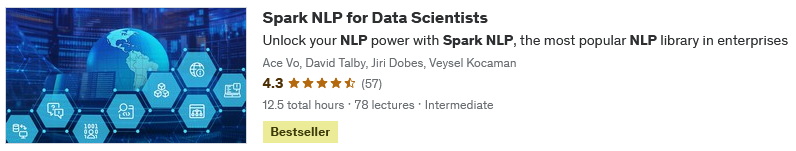

[**Healthcare NLP for Data Scientists**](https://www.udemy.com/course/healthcare-nlp-for-data-scientists/)

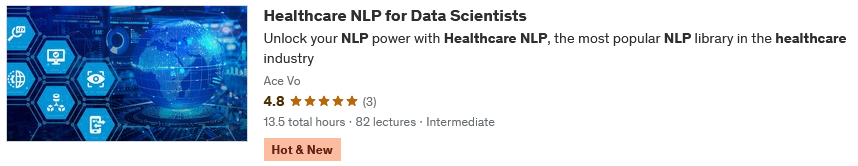

### **Setup and Import Libraries**

In [ ]:
!pip install -q pyspark==3.4.1 spark-nlp==5.5.3
!pip install -q spark-nlp-display

In [ ]:
!pip install -q langchain openai tiktoken faiss-cpu

!pip install -U langchain-community

!pip install -q johnsnowlabs

In [6]:
import sparknlp

from sparknlp.base import *
from sparknlp.annotator import *
from sparknlp.annotator.similarity.document_similarity_ranker import *

from pyspark.ml import Pipeline
from pyspark.sql.types import *
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.functions import col

import pandas as pd

spark = sparknlp.start(gpu=True)

print("Spark NLP version", sparknlp.version())
print("Apache Spark version:", spark.version)

spark

Spark NLP version 5.5.3
Apache Spark version: 3.4.0


## **Basic NLP** and **Deep Learning Solutions**

### **Using Pretrained Pipelines**

For a more detailed notebook, see https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Public/1.SparkNLP_Basics.ipynb

In [4]:
from sparknlp.pretrained import ResourceDownloader
ResourceDownloader.showPublicPipelines(lang="en")

Output hidden; open in https://colab.research.google.com to view.

**✔︎ Explain Document DL**

The `explain_document_dl` pipeline in Spark NLP extracts the following four entities:

PERSON – Names of individuals (e.g., "John Doe").

LOCATION – Geographical places (e.g., "New York", "Europe").

ORGANIZATION – Companies, institutions, government bodies (e.g., "WHO", "Google").

MISC – Miscellaneous entities that don’t fit the other categories (e.g., events, products).

In [69]:
from sparknlp.pretrained import PretrainedPipeline

pipeline_dl = PretrainedPipeline('explain_document_dl', lang='en')

explain_document_dl download started this may take some time.
Approx size to download 168 MB
[OK!]


In [70]:
pipeline_dl.model.stages

[document_7939d5bf1083,
 SENTENCE_05265b07c745,
 REGEX_TOKENIZER_b3f969d18fa3,
 SPELL_e4ea67180337,
 LEMMATIZER_c62ad8f355f9,
 STEMMER_ba49f7631065,
 POS_d01c734956fe,
 WORD_EMBEDDINGS_MODEL_48cffc8b9a76,
 NerDLModel_d4424c9af5f4,
 NER_CONVERTER_a81db9af2d23]

In [71]:
testDoc = '''
Peter Parker is a very good persn.
My life in Russia is very intersting.
John and Peter are brothrs. However they don't support each other that much.
Mercedes Benz is also working on a driverless car.
Europe is very culture rich. There are huge churches! and big houses!
'''

#### Using **.annotate** to get predictions

- Provides a **simplified output** with just the annotated results.

- Returns a dictionary where the keys are the names of the output columns (as defined in the pipeline) and the values are lists of strings containing the annotations.

- Useful when you only need the final results of the annotation **without any additional metadata**.

In [72]:
result = pipeline_dl.annotate(testDoc)

In [73]:
result.keys()

dict_keys(['entities', 'stem', 'checked', 'lemma', 'document', 'pos', 'token', 'ner', 'embeddings', 'sentence'])

In [74]:
result['entities']

['Peter Parker', 'Russia', 'John', 'Peter', 'Mercedes Benz', 'Europe']

In [75]:
import pandas as pd

df = pd.DataFrame({'token':result['token'], 'ner_label':result['ner'],
                      'spell_corrected':result['checked'], 'POS':result['pos'],
                      'lemmas':result['lemma'], 'stems':result['stem']})

df

,token,ner_label,spell_corrected,POS,lemmas,stems
0,Peter,B-PER,Peter,NNP,Peter,peter
1,Parker,I-PER,Parker,NNP,Parker,parker
2,is,O,is,VBZ,be,i
3,a,O,a,DT,a,a
4,very,O,very,RB,very,veri
5,good,O,good,JJ,good,good
6,persn,O,person,NN,person,person
7,.,O,.,.,.,.
8,My,O,My,PRP$,My,my
9,life,O,life,NN,life,life


#### Using **.fullAnnotate** to get more details

- Provides more **comprehensive output**, including both the annotations and the metadata for each token.

- Returns a list of dictionaries, where each dictionary contains **detailed information** about the annotations, including the tokens, entities, and other metadata such as the start and end positions of tokens.

- Useful when you need detailed information about the annotations, such as the positions of tokens in the original text, confidence scores, and other **metadata**.



In [76]:
detailed_result = pipeline_dl.fullAnnotate(testDoc)

detailed_result[0]['entities']

[Annotation(chunk, 1, 12, Peter Parker, {'entity': 'PER', 'sentence': '0', 'chunk': '0'}, []),
 Annotation(chunk, 47, 52, Russia, {'entity': 'LOC', 'sentence': '1', 'chunk': '1'}, []),
 Annotation(chunk, 74, 77, John, {'entity': 'PER', 'sentence': '2', 'chunk': '2'}, []),
 Annotation(chunk, 83, 87, Peter, {'entity': 'PER', 'sentence': '2', 'chunk': '3'}, []),
 Annotation(chunk, 151, 163, Mercedes Benz, {'entity': 'ORG', 'sentence': '4', 'chunk': '4'}, []),
 Annotation(chunk, 202, 207, Europe, {'entity': 'LOC', 'sentence': '5', 'chunk': '5'}, [])]

In [77]:
chunks=[]
entities=[]
for n in detailed_result[0]['entities']:

  chunks.append(n.result)
  entities.append(n.metadata['entity'])

df = pd.DataFrame({'chunks':chunks, 'entities':entities})
df

,chunks,entities
0,Peter Parker,PER
1,Russia,LOC
2,John,PER
3,Peter,PER
4,Mercedes Benz,ORG
5,Europe,LOC


In [78]:
tuples = []

for x,y,z in zip(detailed_result[0]["token"], detailed_result[0]["pos"], detailed_result[0]["ner"]):

  tuples.append((int(x.metadata['sentence']), x.result, x.begin, x.end, y.result, z.result))

df = pd.DataFrame(tuples, columns=['sent_id','token','start','end','pos', 'ner'])

df


,sent_id,token,start,end,pos,ner
0,0,Peter,1,5,NNP,B-PER
1,0,Parker,7,12,NNP,I-PER
2,0,is,14,15,VBZ,O
3,0,a,17,17,DT,O
4,0,very,19,22,RB,O
5,0,good,24,27,JJ,O
6,0,persn,29,33,NN,O
7,0,.,34,34,.,O
8,1,My,36,37,PRP$,O
9,1,life,39,42,NN,O


### **Using Modules in a Pipeline for Custom Tasks**

For a more detailed notebook, see https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Public/2.Text_Preprocessing_with_SparkNLP_Annotators_Transformers.ipynb

In [79]:
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp/master/examples/python/annotation/text/english/spark-nlp-basics/sample-sentences-en.txt

In [80]:
with open('./sample-sentences-en.txt') as f:
  print (f.read())

Peter is a very good person.
My life in Russia is very interesting.
John and Peter are brothers. However they don't support each other that much.
Lucas Nogal Dunbercker is no longer happy. He has a good car though.
Europe is very culture rich. There are huge churches! and big houses!


In [81]:
spark_df = spark.read.text('./sample-sentences-en.txt').toDF('text')

spark_df.show(truncate=False)

+-----------------------------------------------------------------------------+
|text                                                                         |
+-----------------------------------------------------------------------------+
|Peter is a very good person.                                                 |
|My life in Russia is very interesting.                                       |
|John and Peter are brothers. However they don't support each other that much.|
|Lucas Nogal Dunbercker is no longer happy. He has a good car though.         |
|Europe is very culture rich. There are huge churches! and big houses!        |
+-----------------------------------------------------------------------------+



In [82]:
textFiles = spark.sparkContext.wholeTextFiles("./*.txt", 4)

spark_df_folder = textFiles.toDF(schema=['path','text'])

spark_df_folder.show(truncate=140)

+-------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------+
|                                 path|                                                                                                                                        text|
+-------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------+
|             file:/content/holmes.txt|THE ADVENTURES OF SHERLOCK HOLMESArthur Conan Doyle Table of contents A Scandal in Bohemia The Red-Headed League A Case of Identity The B...|
|file:/content/sample-sentences-en.txt|Peter is a very good person.\nMy life in Russia is very interesting.\nJohn and Peter are brothers. However they don't support each other ...|
|     file:/content/sherlockholmes.txt|\n\n\n\n\n\n<!DOCTYPE html>\n<html\n  lang="en"\n  \n  d

In [83]:
documentAssembler = DocumentAssembler()\
.setInputCol("text")\
.setOutputCol("document")

sentenceDetector = SentenceDetector().\
setInputCols(['document']).\
setOutputCol('sentences')

tokenizer = Tokenizer() \
    .setInputCols(["sentences"]) \
    .setOutputCol("token")

nlpPipeline = Pipeline(stages=[
 documentAssembler,
 sentenceDetector,
 tokenizer
 ])

empty_df = spark.createDataFrame([['']]).toDF("text")

pipelineModel = nlpPipeline.fit(empty_df)

In [84]:
result = pipelineModel.transform(spark_df)

In [85]:
result.show(truncate=50)


+--------------------------------------------------+--------------------------------------------------+--------------------------------------------------+--------------------------------------------------+
|                                              text|                                          document|                                         sentences|                                             token|
+--------------------------------------------------+--------------------------------------------------+--------------------------------------------------+--------------------------------------------------+
|                      Peter is a very good person.|[{document, 0, 27, Peter is a very good person....|[{document, 0, 27, Peter is a very good person....|[{token, 0, 4, Peter, {sentence -> 0}, []}, {to...|
|            My life in Russia is very interesting.|[{document, 0, 37, My life in Russia is very in...|[{document, 0, 37, My life in Russia is very in...|[{token, 0, 1, My, {se

In [86]:
result.select('sentences.result').take(3)

[Row(result=['Peter is a very good person.']),
 Row(result=['My life in Russia is very interesting.']),
 Row(result=['John and Peter are brothers.', "However they don't support each other that much."])]

#### Text Matcher

In [87]:
! wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings/Public/data/news_category_train.csv

news_df = spark.read \
      .option("header", True) \
      .csv("news_category_train.csv")

In [88]:
news_df.show(5, truncate=50)

+--------+--------------------------------------------------+
|category|                                       description|
+--------+--------------------------------------------------+
|Business| Short sellers, Wall Street's dwindling band of...|
|Business| Private investment firm Carlyle Group, which h...|
|Business| Soaring crude prices plus worries about the ec...|
|Business| Authorities have halted oil export flows from ...|
|Business| Tearaway world oil prices, toppling records an...|
+--------+--------------------------------------------------+
only showing top 5 rows



In [89]:
from pyspark.sql.functions import col

news_df.groupBy("category") \
    .count() \
    .orderBy(col("count").desc()) \
    .show()

+--------+-----+
|category|count|
+--------+-----+
|   World|30000|
|Sci/Tech|30000|
|  Sports|30000|
|Business|30000|
+--------+-----+



In [90]:
entities = ['Wall Street', 'USD', 'stock', 'NYSE']
with open ('financial_entities.txt', 'w') as f:
    for i in entities:
        f.write(i+'\n')

entities = ['soccer', 'world cup', 'Messi', 'FC Barcelona']
with open ('sport_entities.txt', 'w') as f:
    for i in entities:
        f.write(i+'\n')

In [91]:
documentAssembler = DocumentAssembler()\
    .setInputCol("description")\
    .setOutputCol("document")

tokenizer = Tokenizer() \
    .setInputCols(["document"]) \
    .setOutputCol("token")

financial_entity_extractor = TextMatcher() \
    .setInputCols(["document",'token'])\
    .setOutputCol("financial_entities")\
    .setEntities("financial_entities.txt")\
    .setCaseSensitive(False)\
    .setEntityValue('financial_entity')

sport_entity_extractor = TextMatcher() \
    .setInputCols(["document",'token'])\
    .setOutputCol("sport_entities")\
    .setEntities("sport_entities.txt")\
    .setCaseSensitive(False)\
    .setEntityValue('sport_entity')

nlpPipeline = Pipeline(stages=[
    documentAssembler,
    tokenizer,
    financial_entity_extractor,
    sport_entity_extractor
 ])

empty_df = spark.createDataFrame([['']]).toDF("description")

pipelineModel = nlpPipeline.fit(empty_df)

In [92]:
result = pipelineModel.transform(news_df)

In [93]:
result.select('description','financial_entities.result','sport_entities.result')\
.toDF('text','financial_matches','sport_matches').filter((F.size('financial_matches')>1) | (F.size('sport_matches')>1))\
.show(truncate=100)

+----------------------------------------------------------------------------------------------------+----------------------------------+-------------------+
|                                                                                                text|                 financial_matches|      sport_matches|
+----------------------------------------------------------------------------------------------------+----------------------------------+-------------------+
|"Company launched the biggest electronic auction of stock in Wall Street history Friday but warne...|              [stock, Wall Street]|                 []|
|Google, Inc. significantly cut the expected share price for its initial public stock offering thi...|                    [stock, stock]|                 []|
|Google, Inc. significantly cut the expected share price this morning for its initial public stock...|                    [stock, stock]|                 []|
| Shares of Air Canada  (AC.TO) fell by more than ha

#### Using **Light Pipeline**

- Optimized for single-machine, in-memory processing.

- Faster for **small to medium datasets**.

- Returns a list of dictionaries or pandas DataFrame.

- Useful for **real-time predictions** and prototyping.

In [94]:
light_model = LightPipeline(pipelineModel)

light_result = light_model.fullAnnotate("Google, Inc. significantly cut the expected share price for its stock at Wall Street")

light_result[0]['financial_entities']

[Annotation(chunk, 64, 68, stock, {'entity': 'financial_entity', 'sentence': '0', 'chunk': '0'}, []),
 Annotation(chunk, 73, 83, Wall Street, {'entity': 'financial_entity', 'sentence': '0', 'chunk': '1'}, [])]

### **Pretrained Models**

Spark NLP offers thousands (currently, more than 104,000) of pre-trained models in **250 languages** and all you need to do is to load the pre-trained model into your pipeline by specifying the model name and then configuring the model parameters as per your use case and dataset.

Then you will not need to worry about training a new model from scratch and will be able to enjoy the pre-trained SOTA algorithms directly applied to your own data with transform().



for a more detailed notebook, see https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Public/3.SparkNLP_Pretrained_Models.ipynb

### **Embeddings**

Embeddings are **numerical representations of text** (words, sentences, or documents) in a continuous vector space.

The vectors capture semantic meaning — similar meanings → similar vectors.

Embeddings help models understand that "king" and "queen" are related, and how "Paris" is to France as "Rome" is to Italy.

**Sentence embeddings** represent entire sentences as vectors, capturing overall meaning and context.

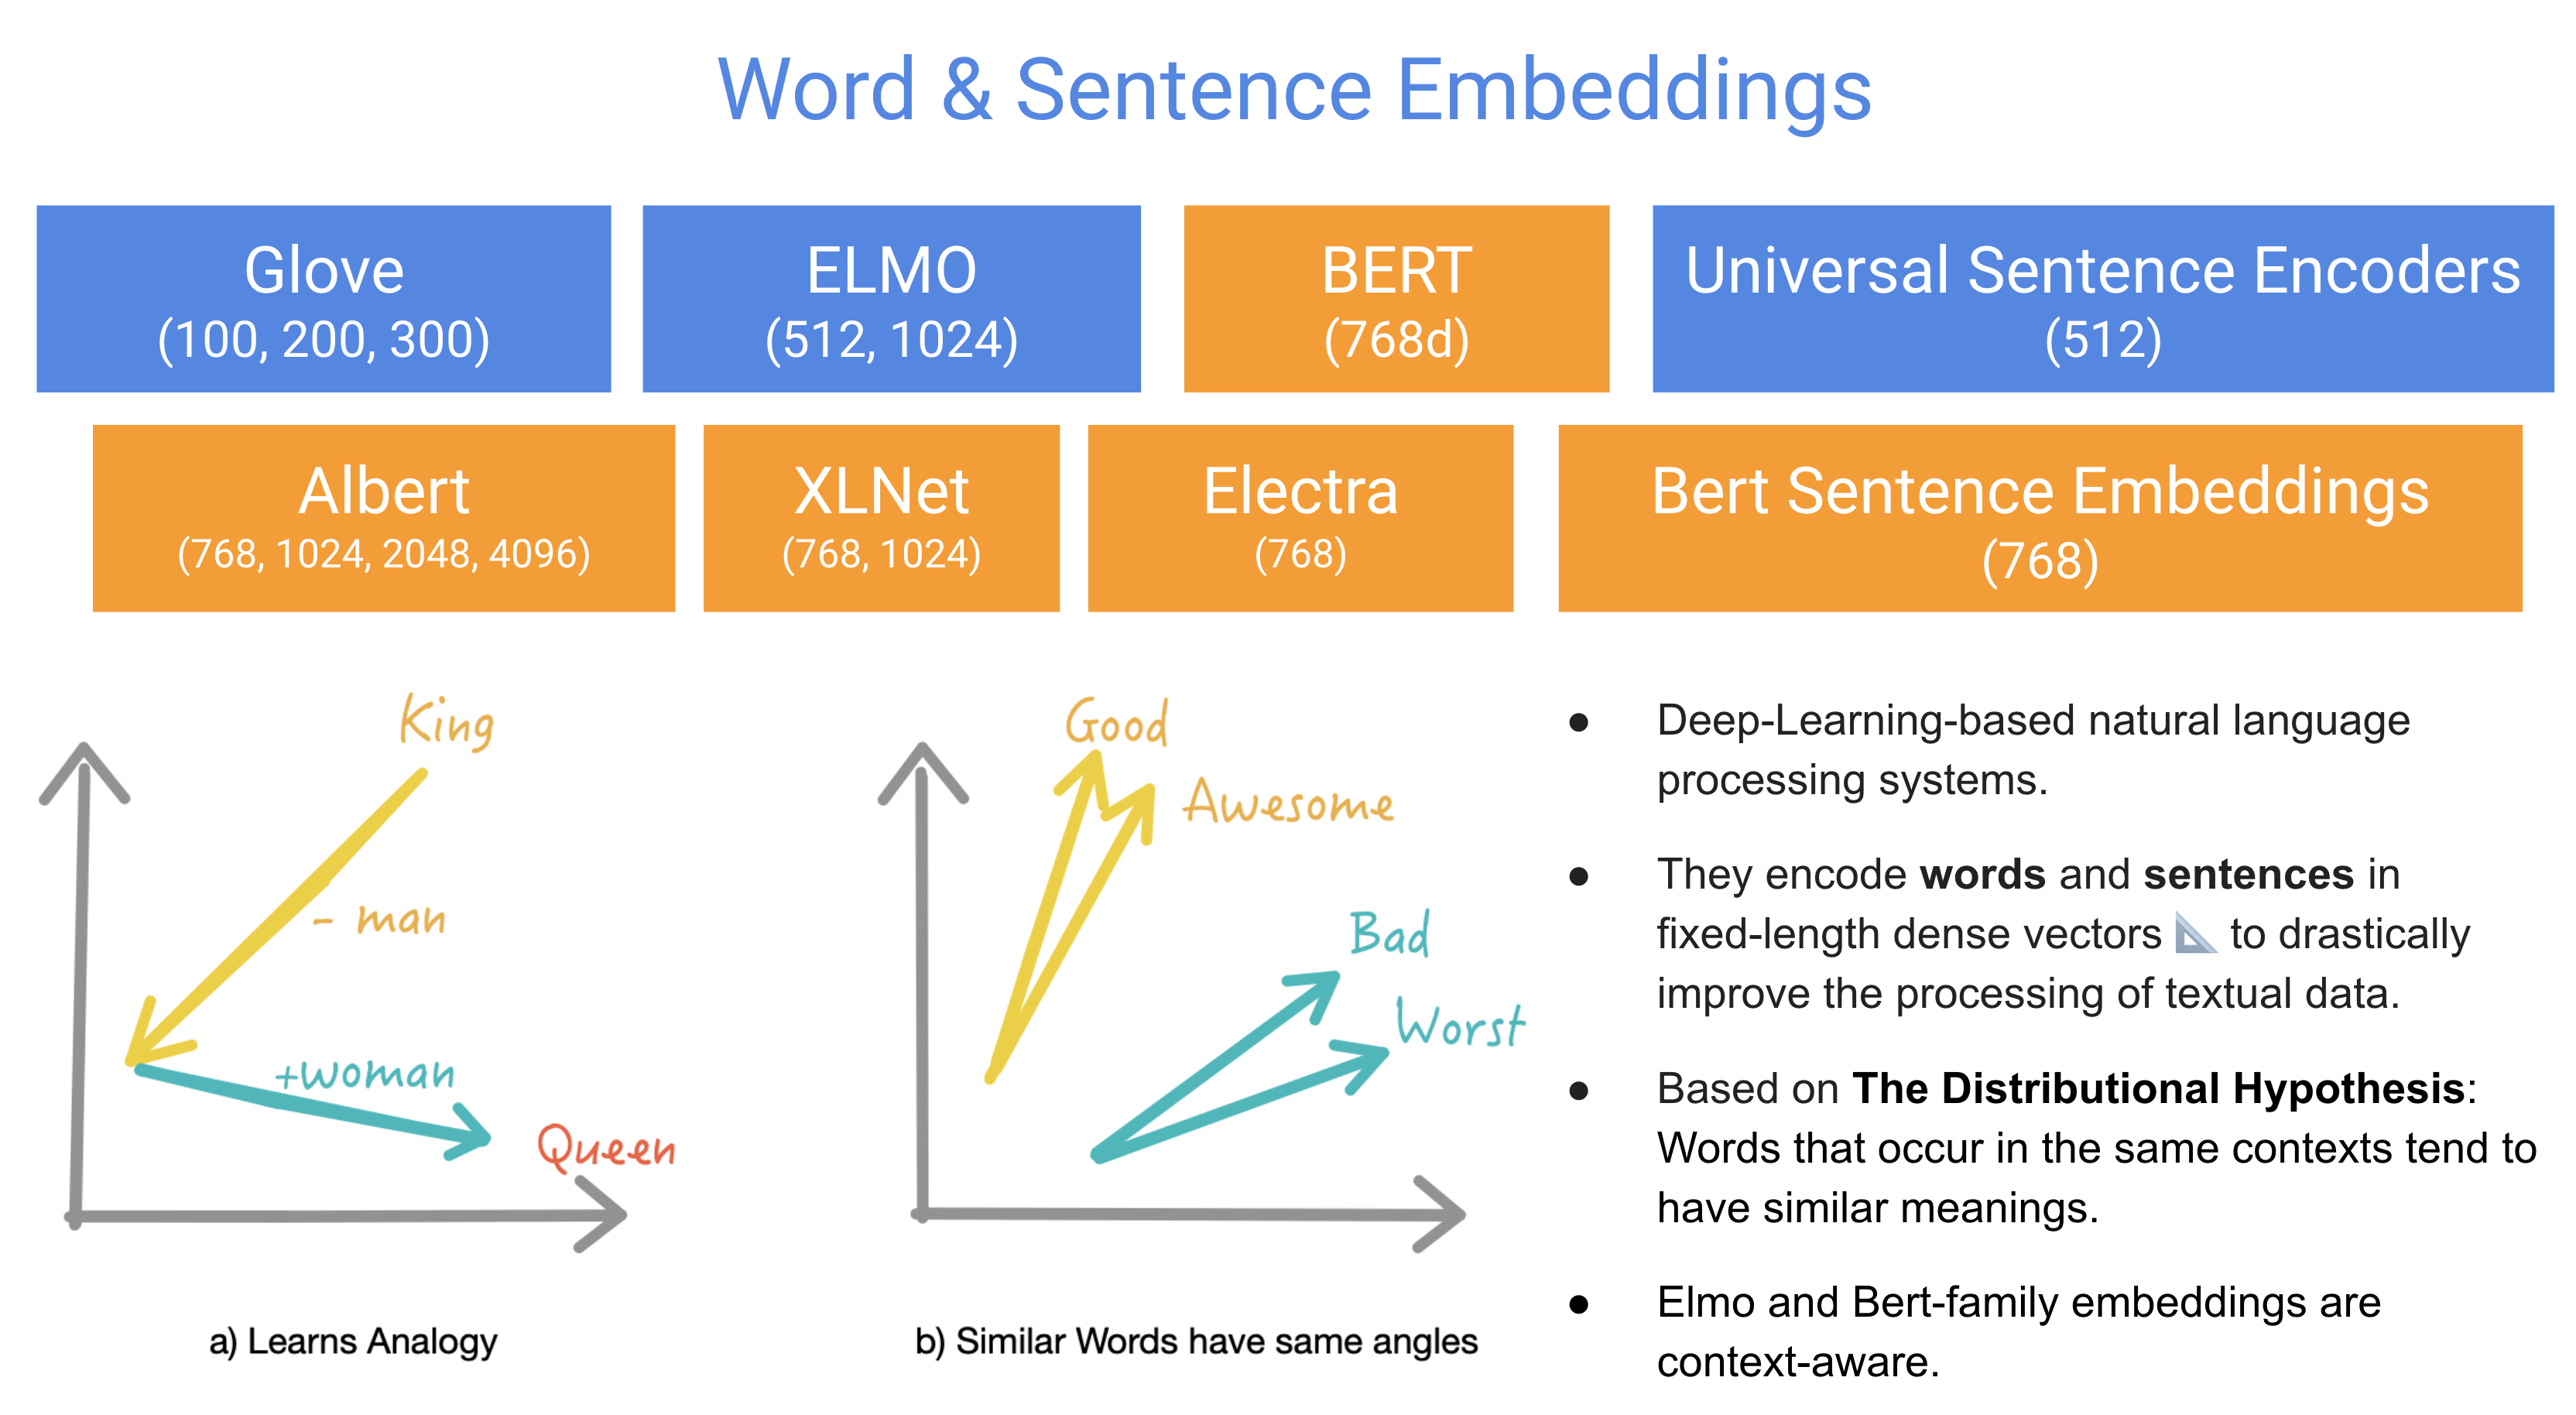

#### Word Embeddings

Word embeddings are **vector representations** of words that capture their meanings based on context and usage.

In [95]:
glove_embeddings = WordEmbeddingsModel.pretrained('glove_100d')\
          .setInputCols(["document", "token"])\
          .setOutputCol("embeddings")

glove_100d download started this may take some time.
Approximate size to download 145.3 MB
[OK!]


In [96]:
documentAssembler = DocumentAssembler()\
.setInputCol("description")\
.setOutputCol("document")

tokenizer = Tokenizer() \
    .setInputCols(["document"]) \
    .setOutputCol("token")

nlpPipeline = Pipeline(stages=[
 documentAssembler,
 tokenizer,
 glove_embeddings
 ])

empty_df = spark.createDataFrame([['']]).toDF("description")

pipelineModel = nlpPipeline.fit(empty_df)

result = pipelineModel.transform(news_df.limit(1))

output = result.select('token.result','embeddings.embeddings').limit(1).rdd.flatMap(lambda x: x).collect()

In [97]:
pd.DataFrame({'token':output[0],'embeddings':output[1]})

,token,embeddings
0,Short,"[-0.4308899939060211, -0.023907000198960304, -..."
1,sellers,"[0.1458200067281723, 0.2753300070762634, -0.20..."
2,",","[-0.10767000168561935, 0.11052999645471573, 0...."
3,Wall,"[0.21383999288082123, 0.22098000347614288, 0.0..."
4,Street's,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5,dwindling,"[-0.5611299872398376, 1.1217999458312988, 0.65..."
6,band,"[-0.12160000205039978, -0.24347999691963196, 0..."
7,of,"[-0.15289999544620514, -0.24278999865055084, 0..."
8,ultra,"[-0.3504500091075897, -0.27733999490737915, 0...."
9,cynics,"[-0.06557200103998184, 0.45271000266075134, 0...."


In [42]:
result = pipelineModel.transform(news_df.limit(10))

result_df = result.select(F.explode(F.arrays_zip(result.token.result, result.embeddings.embeddings)).alias("cols")) \
.select(F.expr("cols['0']").alias("token"),
        F.expr("cols['1']").alias("embeddings"))

result_df.show(10, truncate=150)

+---------+------------------------------------------------------------------------------------------------------------------------------------------------------+
|    token|                                                                                                                                            embeddings|
+---------+------------------------------------------------------------------------------------------------------------------------------------------------------+
|    Short|[-0.43089, -0.023907, -0.081875, 0.044522, 0.33741, -0.23081, -0.35145, 0.33043, -0.92222, -0.22005, 0.33604, 0.37326, -0.035146, 0.1891, 0.47452, ...|
|  sellers|[0.14582, 0.27533, -0.20703, -0.30671, 0.54408, -0.18303, -0.38876, -0.52166, 0.3569, -1.085, 0.15934, -0.18327, 0.42259, -0.29272, -0.37563, 0.008...|
|        ,|[-0.10767, 0.11053, 0.59812, -0.54361, 0.67396, 0.10663, 0.038867, 0.35481, 0.06351, -0.094189, 0.15786, -0.81665, 0.14172, 0.21939, 0.58505, -0.52...|
|     Wall|[0.21384, 0

#### Bert Embeddings

BERT (Bidirectional Encoder Representations from Transformers) is a powerful language model designed to pre-train deep **bidirectional representations** by considering both left and right context in all layers.

Unlike previous models, BERT **learns from unlabeled text** and can be fine-tuned with minimal modifications to achieve state-of-the-art performance on tasks like question answering and language inference.

In [43]:
bert_embeddings = BertEmbeddings.pretrained('small_bert_L2_768')\
          .setInputCols(["document", "token"])\
          .setOutputCol("embeddings")

small_bert_L2_768 download started this may take some time.
Approximate size to download 135.3 MB
[OK!]


In [44]:
documentAssembler = DocumentAssembler()\
    .setInputCol("description")\
    .setOutputCol("document")

tokenizer = Tokenizer() \
    .setInputCols(["document"]) \
    .setOutputCol("token")

nlpPipeline = Pipeline(stages=[
 documentAssembler,
 tokenizer,
 bert_embeddings
 ])

empty_df = spark.createDataFrame([['']]).toDF("description")

pipelineModel = nlpPipeline.fit(empty_df)

result = pipelineModel.transform(news_df.limit(10))

result_df = result.select(F.explode(F.arrays_zip(result.token.result, result.embeddings.embeddings)).alias("cols")) \
.select(F.expr("cols['0']").alias("token"),
        F.expr("cols['1']").alias("bert_embeddings"))

result_df.show(truncate=150)

+----------+------------------------------------------------------------------------------------------------------------------------------------------------------+
|     token|                                                                                                                                       bert_embeddings|
+----------+------------------------------------------------------------------------------------------------------------------------------------------------------+
|     Short|[0.104577005, 0.13878724, 0.1569307, -0.46445152, 0.4406927, 0.1538051, -0.057127196, 0.07546041, -0.028798085, -0.059456266, -0.107301235, 0.14494...|
|   sellers|[-0.25025356, 0.116001554, -0.3513374, 0.04930625, 0.121860266, -0.0037040962, -0.5098452, -0.06233933, -0.15563184, -0.25171357, 0.30774987, 0.207...|
|         ,|[0.5174885, 0.25481734, 0.12593265, -0.23021868, 0.36545914, -0.16627318, -0.12387347, -0.15111203, -0.117636524, 0.10161038, 0.20787796, 0.2079943...|
|      Wall|[-0.

#### Bert Sentence Embeddings

BERT sentence embeddings leverage BERT's deep bidirectional representations to generate **meaningful vector representations of entire sentences**.

By capturing contextual relationships between words, these embeddings enable high-quality performance on tasks like semantic similarity, sentence clustering, and retrieval, without requiring task-specific architectures.

In [45]:
sentenceDetector = SentenceDetector()\
      .setInputCols(['document'])\
      .setOutputCol('sentences')

bert_sentence_embeddings = BertSentenceEmbeddings.pretrained('sent_small_bert_L6_128')\
      .setInputCols(["sentences"])\
      .setOutputCol("bert_sent_embeddings")

nlpPipeline = Pipeline(stages=[
    documentAssembler,
    sentenceDetector,
    bert_sentence_embeddings
 ])

empty_df = spark.createDataFrame([['']]).toDF("description")

pipelineModel = nlpPipeline.fit(empty_df)

result = pipelineModel.transform(news_df.limit(10))

result_df = result.select(F.explode(F.arrays_zip(result.sentences.result, result.bert_sent_embeddings.embeddings)).alias("cols")) \
.select(F.expr("cols['0']").alias("sentence"),
        F.expr("cols['1']").alias("bert_sent_embeddings"))

result_df.show(truncate=100)

sent_small_bert_L6_128 download started this may take some time.
Approximate size to download 19 MB
[OK!]
+----------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------+
|                                                                                            sentence|                                                                                bert_sent_embeddings|
+----------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------+
|                Short sellers, Wall Street's dwindling band of ultra cynics, are seeing green again.|[-0.41623703, 0.51871425, -0.44957834, 0.39405015, -1.2309499, -1.6415104, 0.746234, 0.50732696, ...|
|Private investment firm Carlyle Group, which has a reputation for making well

### **Named Entity Recognition (NER) Models**

Named Entity Recognition (NER) is an NLP task that involves **identifying and extracting entities** from text, such as people, organizations, locations, dates, and other types of named entities.

NER aims to automatically recognize and classify named entities within a text, providing valuable information that can be used for various applications.

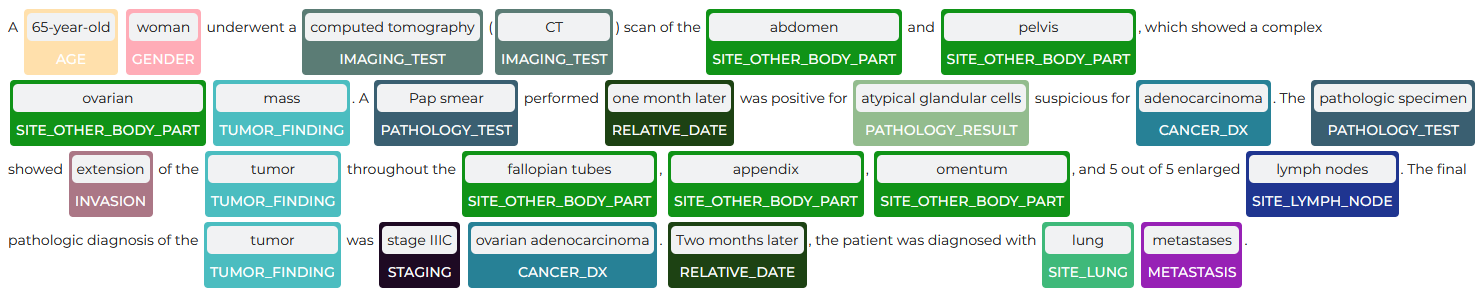

For a detailed notebook, see https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Public/4.NERDL_Training.ipynb

Use [**onto_100**](https://sparknlp.org/2020/02/03/onto_100_en.html) model to extract basic entities from unstructured text and get the results in a structured form (dataframe).

In [98]:
glove_embeddings = WordEmbeddingsModel.pretrained('glove_100d')\
    .setInputCols(["document", "token"])\
    .setOutputCol("embeddings")

onto_ner = NerDLModel.pretrained("onto_100", 'en') \
    .setInputCols(["document", "token", "embeddings"]) \
    .setOutputCol("ner")

ner_converter = NerConverter() \
    .setInputCols(["document", "token", "ner"]) \
    .setOutputCol("ner_chunk")

nlpPipeline = Pipeline(stages=[
 documentAssembler,
 tokenizer,
 glove_embeddings,
 onto_ner,
 ner_converter
 ])

empty_df = spark.createDataFrame([['']]).toDF("description")

pipelineModel = nlpPipeline.fit(empty_df)

glove_100d download started this may take some time.
Approximate size to download 145.3 MB
[OK!]
onto_100 download started this may take some time.
Approximate size to download 13.5 MB
[OK!]


In [99]:
result = pipelineModel.transform(news_df.limit(10))

result.select(F.explode(F.arrays_zip(result.ner_chunk.result, result.ner_chunk.metadata)).alias("cols")) \
.select(F.expr("cols['0']").alias("chunk"),
        F.expr("cols['1']['entity']").alias("ner_label")).show(truncate=False)

+--------------------------------+---------+
|chunk                           |ner_label|
+--------------------------------+---------+
|Carlyle Group                   |ORG      |
|next week                       |DATE     |
|summer                          |DATE     |
|Iraq                            |GPE      |
|Saturday                        |DATE     |
|three months                    |DATE     |
|US                              |GPE      |
|Friday                          |DATE     |
|the year                        |DATE     |
|#36;46                          |CARDINAL |
|Dell Inc                        |ORG      |
|#36;1.17 billion                |CARDINAL |
|the latest week                 |DATE     |
|#36;849.98 trillion             |CARDINAL |
|the Investment Company Institute|ORG      |
|Thursday                        |DATE     |
|July                            |DATE     |
|last week                       |DATE     |
|Thursday                        |DATE     |
|midsummer

In [100]:
sample_text = """
Sundar Pichai the CEO of Google, recently met with Tim Cook, the CEO of Apple, at a technology conference in Silicon Valley.

The conference, organized by the Tech Innovators Association, took place at the San Jose Convention Center.

Google and Apple have been investing heavily in AI research, with projects ranging from smart home devices to autonomous vehicles.

After the conference, Pichai and Cook were spotted having dinner at a popular local restaurant, Le Papillon, sparking speculation about potential collaborations between the tech giants.
"""

In [101]:
light_model = LightPipeline(pipelineModel)

light_result = light_model.fullAnnotate(sample_text)

chunks = []
entities = []

for n in light_result[0]['ner_chunk']:

    chunks.append(n.result)
    entities.append(n.metadata['entity'])

import pandas as pd

df = pd.DataFrame({'chunks':chunks, 'entities':entities})

df

,chunks,entities
0,Sundar Pichai,PERSON
1,Google,ORG
2,Tim Cook,PERSON
3,Apple,ORG
4,Silicon Valley,LOC
5,the Tech Innovators Association,ORG
6,the San Jose Convention Center,ORG
7,Google,ORG
8,Apple,ORG
9,Pichai,PERSON


#### Visualize the Results by **Spark NLP Display**

[**Spark NLP Display**](https://sparknlp.org/docs/en/display) is a utility in the Spark NLP library that provides visualization and debugging tools for NLP pipelines.

- Helps visualize the results of NLP annotations on text data.

- Shows detailed information about entities, relations, and other NLP features.

- Typically used after running a Spark NLP pipeline to inspect and validate results.

- Can generate HTML output for easy viewing in notebooks or browsers.


In [103]:
from sparknlp_display import NerVisualizer

visualiser = NerVisualizer()

visualiser.display(light_result[0], label_col='ner_chunk', document_col='document')

#### **Train a NER Model**

To train a new NER model from scratch, please check out:

https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Public/4.NERDL_Training.ipynb


### **Text Classification**

Text classification is the process of **automatically assigning** predefined **labels** or categories to a given text.

Widely used in applications like spam detection, sentiment analysis, topic categorization, and customer feedback tagging.

Text classification models **learn patterns in the data** and predict the appropriate category for new, unseen text based on those patterns.

For a detailed notebook, see https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Public/5.Text_Classification_with_ClassifierDL.ipynb

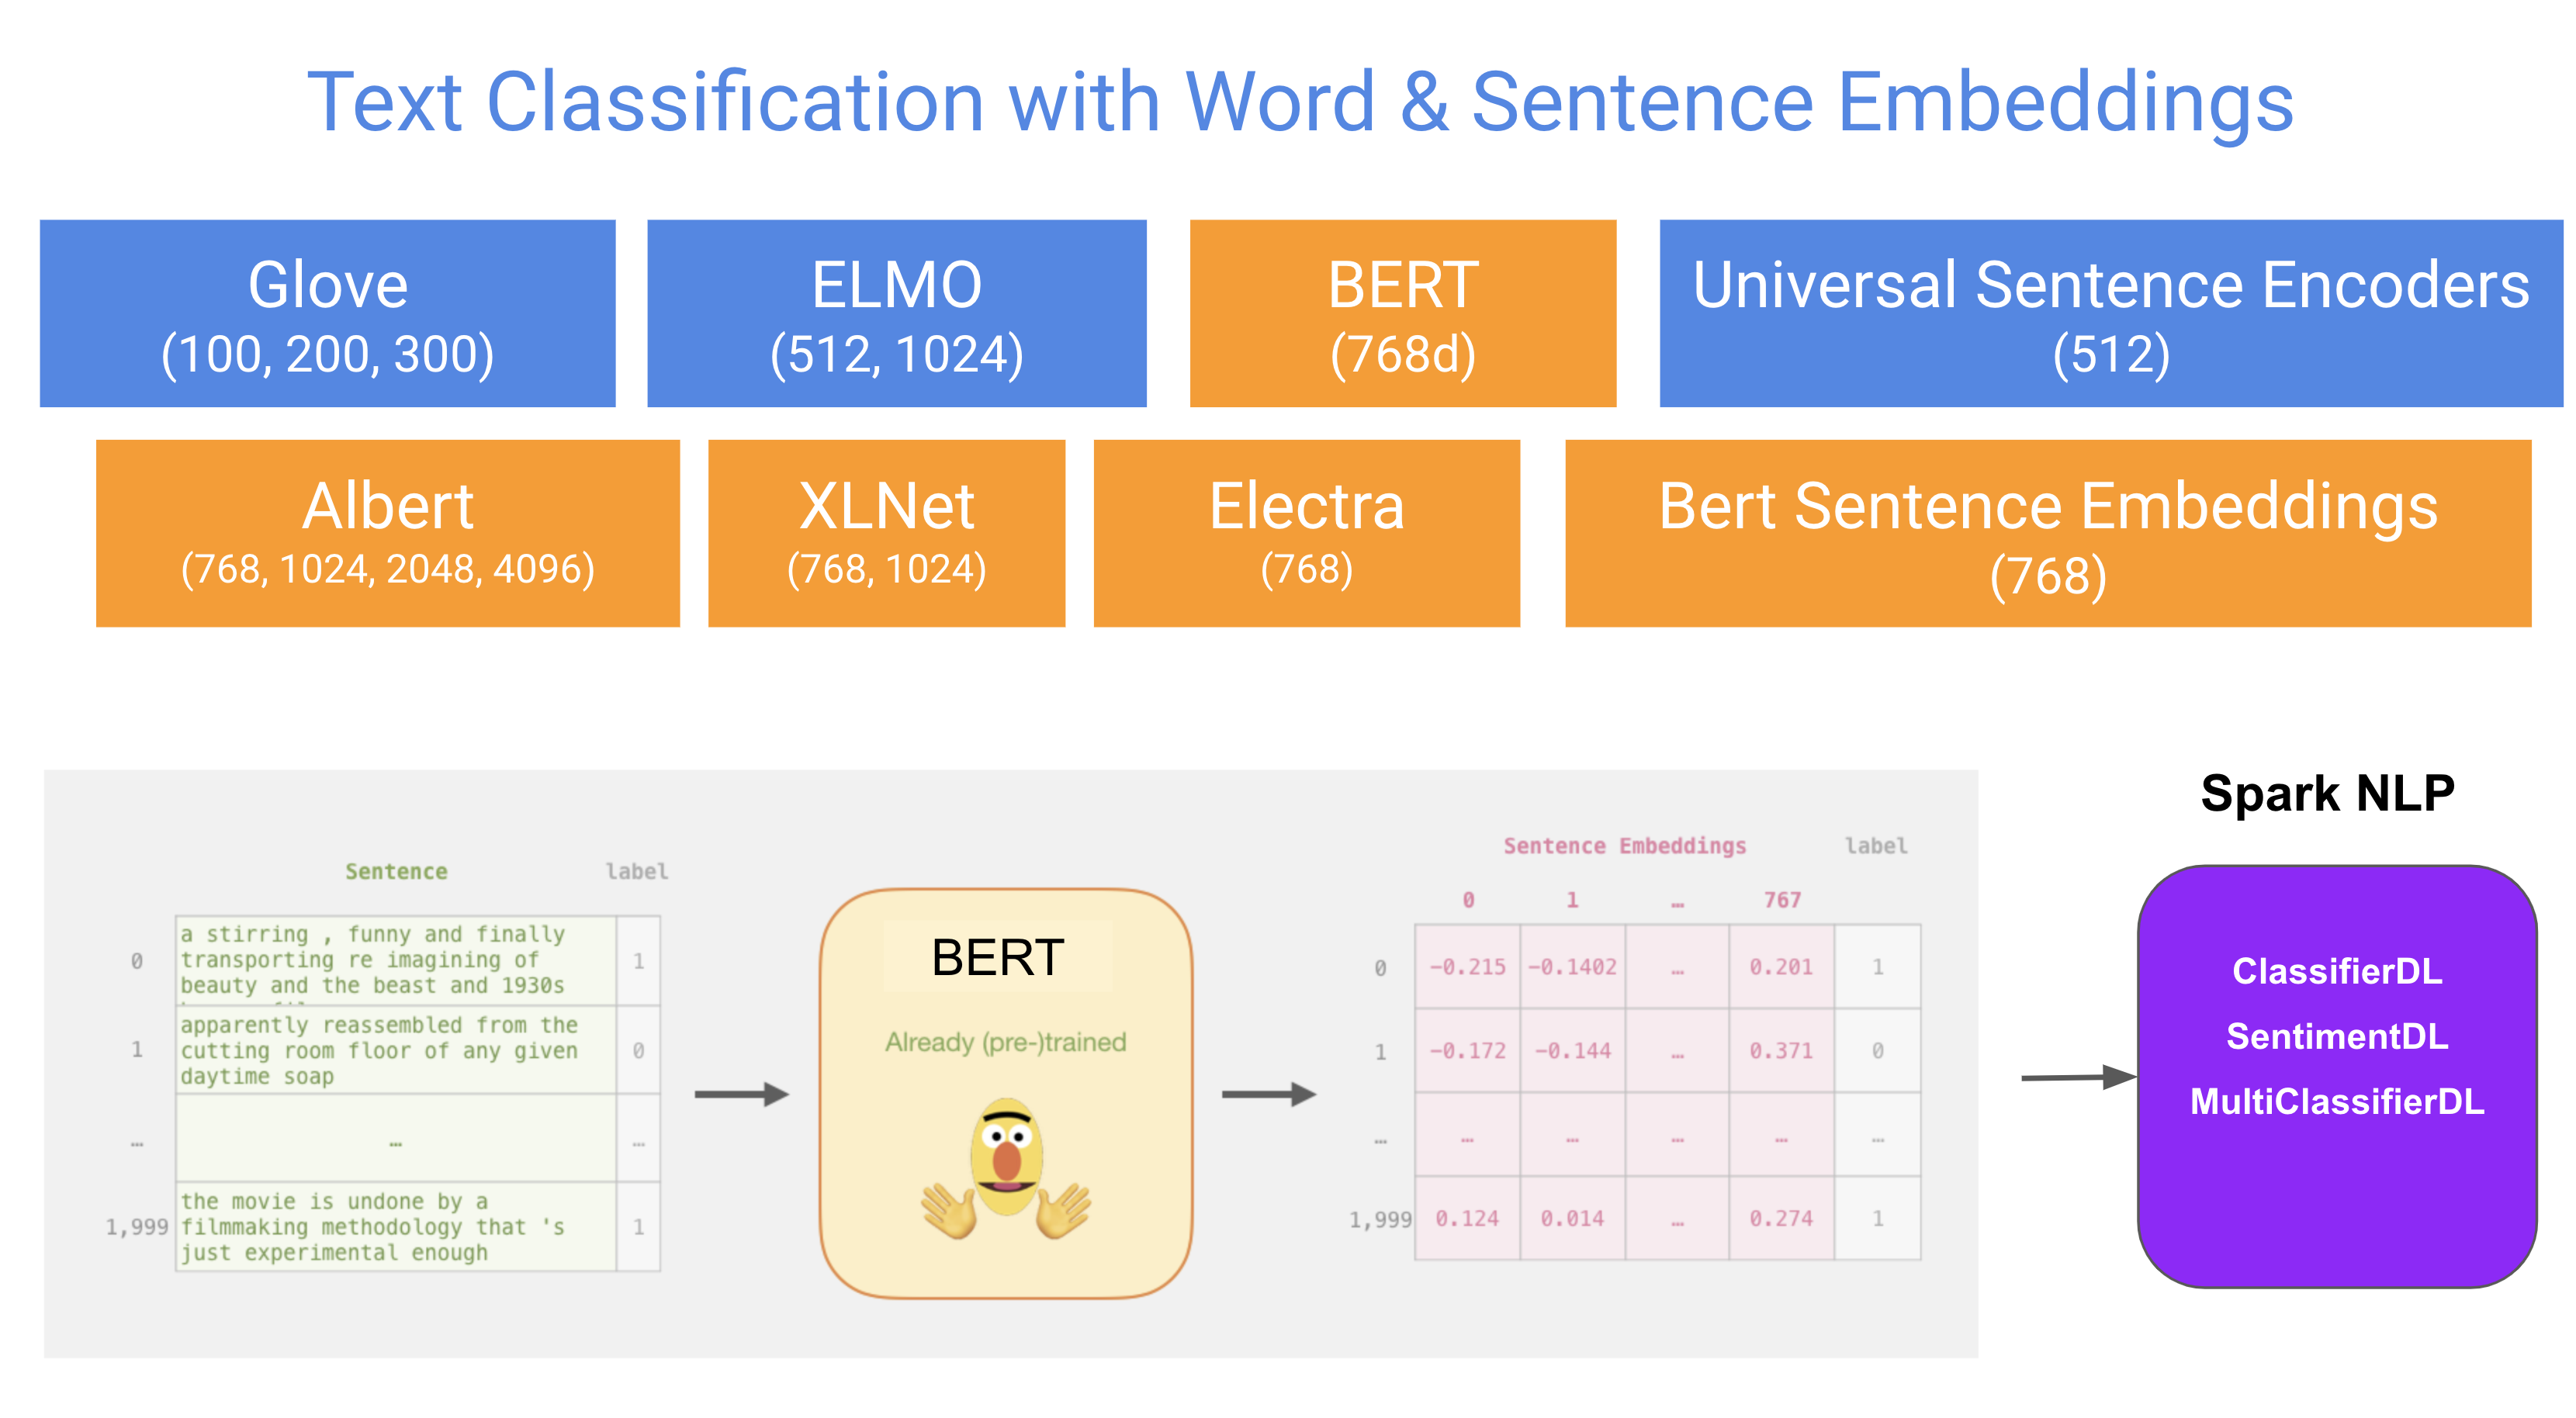

Spark NLP provides powerful capabilities for **text classification**, allowing users to categorize text data into predefined classes. This is useful for a wide range of applications, including sentiment analysis, spam detection, topic categorization, and more.

- Spark NLP offers **pretrained models** for various text classification tasks, enabling users to quickly implement classification without the need for extensive training.

- Users can **train their own text classification models** on custom datasets using Spark NLP's deep learning frameworks, including ClassifierDL, SentimentDL, and others.

- Supports both single-label classification, where each document belongs to one class, and **multi-label classification**, where each document can belong to multiple classes.

- Leveraging Apache Spark, Spark NLP can handle large-scale datasets efficiently, making it suitable for big data applications.



For more user experience and information, check out these notebooks :

- [Text_Classification_with_ClassifierDL](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/open-source-nlp/05.0.Text_Classification_with_ClassifierDL.ipynb)

- [SentimentDL_Train_Multiclass_Sentiment_Classifier](https://github.com/JohnSnowLabs/spark-nlp/blob/master/examples/python/training/english/classification/SentimentDL_train_multiclass_sentiment_classifier.ipynb)

- [MultiClassifierDL_Train_Multi_Label_Toxic_Classifier](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/jupyter/training/english/classification/MultiClassifierDL_train_multi_label_toxic_classifier.ipynb)

- [Text_Classification_Examples_in_SparkML_SparkNLP](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/open-source-nlp/05.1.Text_Classification_Examples_in_SparkML_SparkNLP.ipynb)

- [Transformers_for_Sequence_Classification_in_SparkNLP](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/open-source-nlp/05.2.Transformers_for_Sequence_Classification_in_SparkNLP.ipynb)

- [Multi_Lingual_Training_and_Models](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/open-source-nlp/05.3.Multi_Lingual_Training_and_Models.ipynb)

#### **Sentence Embeddings**

Sentence embeddings are crucial for **Text Classification** because they encode the semantic meaning of entire sentences into fixed-size vectors, allowing for consistent and efficient processing of variable-length inputs.

They capture contextual nuances, reduce dimensionality, and provide rich feature representations that enhance model performance.

**BertSentenceEmbeddings** are derived from the BERT (Bidirectional Encoder Representations from Transformers) model. They capture rich contextual information by considering **both the left and right** context of each word in a sentence, providing high-quality sentence-level representations.

**RoBertaSentenceEmbeddings** are based on the RoBERTa (Robustly optimized BERT approach) model, and these embeddings **improve on BERT** by using more data and training techniques.

**XlmRoBertaSentenceEmbeddings** come from the XLM-RoBERTa (Cross-lingual RoBERTa) model, which extends RoBERTa to handle **multiple languages**.

**E5Embeddings** are designed for efficient and effective sentence-level encoding. They focus on capturing the meaning of sentences and are optimized for performance in various NLP tasks.

**InstructorEmbeddings** provide contextual representations of sentences by leveraging instruction-following models. These embeddings are designed to understand and follow complex instructions, making them useful for tasks that require detailed and nuanced sentence understanding.

**BGEEmbeddings** - BGE (Bidirectional Generative Encoder) embeddings are specialized for generating high-quality sentence representations by encoding sentences bidirectionally. They are suitable for tasks that require deep semantic understanding of sentences.

**MPNetEmbeddings** - MPNet (Masked and Permuted Network) embeddings are designed to capture sentence-level semantics by utilizing both masked and permuted language modeling techniques.

**UAEEmbeddings** - UAE (Universal Action Encoder) embeddings are focused on encoding sentences with an emphasis on action-related semantics.

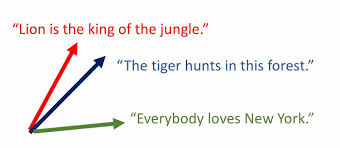

#### ClassifierDL

`ClassifierDL` is a deep learning-based text classification annotator in Spark NLP used for classifying texts into predefined categories.

Allows training of custom classification models on specific datasets, enabling fine-tuning for particular use cases and domains.

Compatible with **various pretrained word embeddings** like Word2Vec, GloVe, BERT, and others, enhancing the model's ability to understand and classify text accurately.


##### Use a **Pretrained Model**

[classifierdl_electra_questionpair](https://sparknlp.org/2021/08/13/classifierdl_electra_questionpair_en.html) identifies whether two question sentences are semantically repetitive or different.

In [ ]:
document = DocumentAssembler()\
.setInputCol("text")\
.setOutputCol("document")

embeddings = BertSentenceEmbeddings.pretrained("sent_electra_large_uncased", "en") \
.setInputCols("document") \
.setOutputCol("sentence_embeddings")

document_classifier = ClassifierDLModel.pretrained('classifierdl_electra_questionpair', 'en') \
.setInputCols(["sentence_embeddings"]) \
.setOutputCol("class")

nlpPipeline = Pipeline(stages=[document, embeddings, document_classifier])

In [53]:
light_pipeline = LightPipeline(nlpPipeline.fit(spark.createDataFrame([['']]).toDF("text")))

result_1 = light_pipeline.annotate("q1: What is your favorite movie? q2: Which movie do you like most?")

print(result_1["class"])

['almost_same']


In [54]:
result_2 = light_pipeline.annotate("q1: What is your favorite movie? q2: Which movie genre would you like to watch?")

print(result_2["class"])

['not_same']


##### **Train a Text Classification Model**

To train a model from scratch:

https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Public/5.Text_Classification_with_ClassifierDL.ipynb

## **Transformers and Large Language Modeling**

### **Translation**


Translation by Spark NLP iinvolves using models to automatically convert text from one language to another.

State-of-the-art models like **MarianMT** and **M2M100** enable high-quality translations across numerous language pairs.

These models are trained on large datasets and can handle complex linguistic structures, idioms, and context.

#### **MarianTransformer**: Fast Neural Machine Translation

Marian is an efficient, free Neural Machine Translation framework written in pure C++ with minimal dependencies.

It is currently the engine behind the Microsoft Translator Neural Machine Translation services and being deployed by many companies, organizations and research projects.

Note that this model only supports inputs up to 512 tokens. If you are working with longer inputs, consider splitting them first. For example, you can use the SentenceDetectorDL annotator to split longer texts into sentences.


The default model is `"opus_mt_en_fr"`, default language is `"xx"` (meaning multi-lingual), if no values are provided.


[MarianNMT at Github Repo](https://colab.research.google.com/github/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Public/20.0_Translations.ipynb#scrollTo=EbbuH3ozxYnr)

In [ ]:
documentAssembler = DocumentAssembler() \
    .setInputCol("text") \
    .setOutputCol("document")

sentence_detector = SentenceDetectorDLModel.pretrained("sentence_detector_dl", "xx") \
    .setInputCols("document") \
    .setOutputCol("sentence")

marian = MarianTransformer.pretrained("opus_mt_en_fr","xx") \
    .setInputCols("sentence") \
    .setOutputCol("translation") \
    .setMaxInputLength(128)

pipeline = Pipeline() \
    .setStages([
        documentAssembler,
        sentence_detector,
        marian
    ])

In [ ]:
text = "What is the capital of France? We should know this in french."

data = spark.createDataFrame([[text]]).toDF("text")
result = pipeline.fit(data).transform(data)

result.selectExpr("sentence.result as sentence", "translation.result as translation").show(truncate=False)

+----------------------------------------------------------------+--------------------------------------------------------------------------+
|sentence                                                        |translation                                                               |
+----------------------------------------------------------------+--------------------------------------------------------------------------+
|[What is the capital of France?, We should know this in french.]|[Quelle est la capitale de la France ?, On devrait le savoir en français.]|
+----------------------------------------------------------------+--------------------------------------------------------------------------+



### **Summarization**

**BART Transformer**, developed by Facebook AI, is a powerful model for text summarization.

BART produces high-quality summaries by **understanding context** and maintaining the essential information, making it ideal for applications like news summarization, report generation, and content summarization.


In [ ]:
documentAssembler = DocumentAssembler() \
    .setInputCol("text") \
    .setOutputCol("document")

# Can take in document or sentence columns
bart = BartTransformer.pretrained(name="distilbart_xsum_12_6",lang='en') \
    .setInputCols('document')\
    .setOutputCol("Bart")\
    .setMaxOutputLength(100)

# Build pipeline with BART
pipeline = Pipeline().setStages([
    documentAssembler,
    bart
])

distilbart_xsum_12_6 download started this may take some time.
Approximate size to download 814.1 MB
[OK!]


In [ ]:
# Set the task for questions on T5
bart.setTask('summarize')

BartTRANSFORMER_60312c2bc2f0

In [ ]:
text = """(Reuters) - Mastercard Inc said on Wednesday it was planning to offer support for some cryptocurrencies on its network this year, joining a string of big-ticket firms that have pledged similar support.

The credit-card giant’s announcement comes days after Elon Musk’s Tesla Inc revealed it had purchased $1.5 billion of bitcoin and would soon accept it as a form of payment.

Asset manager BlackRock Inc and payments companies Square and PayPal have also recently backed cryptocurrencies.

Mastercard already offers customers cards that allow people to transact using their cryptocurrencies, although without going through its network.

"Doing this work will create a lot more possibilities for shoppers and merchants, allowing them to transact in an entirely new form of payment. This change may open merchants up to new customers who are already flocking to digital assets," Mastercard said. (mstr.cd/3tLaPZM)

Mastercard specified that not all cryptocurrencies will be supported on its network, adding that many of the hundreds of digital assets in circulation still need to tighten their compliance measures.

Many cryptocurrencies have struggled to win the trust of mainstream investors and the general public due to their speculative nature and potential for money laundering.
"""

df=spark.createDataFrame([[text]]).toDF('text')

In [ ]:
annotated_df = pipeline.fit(df).transform(df)

annotated_df.select(['bart.result']).show(truncate=False)

+----------------------------------------------------------------------------------------------------+
|result                                                                                              |
+----------------------------------------------------------------------------------------------------+
|[ Blockchain, Bitcoin and other digital assets will soon be accepted as payment through Mastercard.]|
+----------------------------------------------------------------------------------------------------+



In [ ]:
v = annotated_df.take(1)

print(f"Original Length {len(v[0].text)}   Summarized Length : {len(v[0].Bart[0].result)} ")

Original Length 1284   Summarized Length : 169 


### **e-mail Reader**

`sparknlp.read().email()` method in Spark NLP, a powerful feature designed to **parse email content** seamlessly into a Spark DataFrame.

Whether working with emails stored on a local file system or distributed storage solutions such as HDFS or cloud-based platforms, this method streamlines the extraction and structuring of email data.

By leveraging Spark NLP’s capabilities, users can efficiently process large volumes of email content for various NLP tasks.


For local files example we will download a couple of email files from Spark NLP Github repo:

In [7]:
!mkdir email-files

!wget https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp/master/src/test/resources/reader/email/email-text-attachments.eml -P email-files
!wget https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp/master/src/test/resources/reader/email/test-several-attachments.eml -P email-files

--2025-04-08 14:49:11--  https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp/master/src/test/resources/reader/email/email-text-attachments.eml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3175 (3.1K) [text/plain]
Saving to: ‘email-files/email-text-attachments.eml’

email-text-attachme 100%[===================>]   3.10K  --.-KB/s    in 0s      

2025-04-08 14:49:12 (60.9 MB/s) - ‘email-files/email-text-attachments.eml’ saved [3175/3175]

--2025-04-08 14:49:12--  https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp/master/src/test/resources/reader/email/test-several-attachments.eml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.gi

In [8]:
email_df = sparknlp.read().email("./email-files")

email_df.select("email").show(truncate = False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### **HTML Reader**

`sparknlp.read().html()` method in Spark NLP **parses HTML content** from both local files and real-time URLs into a Spark DataFrame.

**Key Features:**
- Ability to parse HTML from local directories and URLs.
- Versatile support for varied data ingestion scenarios.

For local files example we will download a couple of HTML files from Spark NLP Github repo:

In [9]:
!mkdir html-files

!wget https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp/master/src/test/resources/reader/html/example-10k.html -P html-files
!wget https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp/master/src/test/resources/reader/html/fake-html.html -P html-files

--2025-04-08 14:49:24--  https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp/master/src/test/resources/reader/html/example-10k.html
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2456707 (2.3M) [text/plain]
Saving to: ‘html-files/example-10k.html’

example-10k.html    100%[===================>]   2.34M  --.-KB/s    in 0.03s   

2025-04-08 14:49:24 (87.3 MB/s) - ‘html-files/example-10k.html’ saved [2456707/2456707]

--2025-04-08 14:49:24--  https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp/master/src/test/resources/reader/html/fake-html.html
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:4

In [10]:
html_df = sparknlp.read().html("./html-files")

html_df.show(truncate = 100)

+-----------------------------------------+----------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------+
|                                     path|                                                                                             content|                                                                                                html|
+-----------------------------------------+----------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------+
|  file:/content/html-files/fake-html.html|<!DOCTYPE html>\n<html>\n<body>\n\n<h1>My First Heading</h1>\n<h2>My Second Heading</h2>\n<p>My f...|[{Title, My First Heading, {pageNumber -> 1}}, {Title, My Second Heading, {pageNumber -> 1}}, {Na...|
|file:/content/h

Parsing HTML from **Real-Time URLs**.

In [11]:
html_df = sparknlp.read().html("https://example.com/")
html_df.select("html").show(truncate = 150)

+------------------------------------------------------------------------------------------------------------------------------------------------------+
|                                                                                                                                                  html|
+------------------------------------------------------------------------------------------------------------------------------------------------------+
|[{Title, Example Domain, {pageNumber -> 1}}, {NarrativeText, This domain is for use in illustrative examples in documents. You may use this domain ...|
+------------------------------------------------------------------------------------------------------------------------------------------------------+



In [12]:
htmls_df = sparknlp.read().html(["https://www.wikipedia.org", "https://example.com/"])
htmls_df.show(truncate = 350)

+-------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|                      url|                                                                                                                                                                                                                                                                                                                                                               html|
+-------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### **Word Reader**

`sparknlp.read().doc()` method in Spark NLP parses Word document contents from both local and distributed file systems into a Spark DataFrame.



For local files example we will download a couple of Word files from Spark NLP Github repo:

In [13]:
!mkdir word-files

!wget https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp/master/src/test/resources/reader/doc/contains-pictures.docx -P word-files
!wget https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp/master/src/test/resources/reader/doc/fake_table.docx -P word-files

--2025-04-08 14:49:34--  https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp/master/src/test/resources/reader/doc/contains-pictures.docx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 95087 (93K) [application/octet-stream]
Saving to: ‘word-files/contains-pictures.docx’

contains-pictures.d 100%[===================>]  92.86K  --.-KB/s    in 0.008s  

2025-04-08 14:49:34 (11.5 MB/s) - ‘word-files/contains-pictures.docx’ saved [95087/95087]

--2025-04-08 14:49:34--  https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp/master/src/test/resources/reader/doc/fake_table.docx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent

In [14]:
!ls -lh ./word-files

total 112K
-rw-r--r-- 1 root root 93K Apr  8 14:49 contains-pictures.docx
-rw-r--r-- 1 root root 13K Apr  8 14:49 fake_table.docx


In [15]:
doc_df = sparknlp.read().doc("./word-files")

doc_df.select("doc").show(truncate = 150)

+------------------------------------------------------------------------------------------------------------------------------------------------------+
|                                                                                                                                                   doc|
+------------------------------------------------------------------------------------------------------------------------------------------------------+
|    [{Table, Header Col 1, {}}, {Table, Header Col 2, {}}, {Table, Lorem ipsum, {}}, {Table, A Link example, {}}, {NarrativeText, Dolor sit amet, {}}]|
|[{Header, An inline picture in the header., {}}, {NarrativeText, Some paragraph text that runs “through” the floating picture: Lorem ipsum dolor si...|
+------------------------------------------------------------------------------------------------------------------------------------------------------+



### **Document Splitter**

`DocumentCharacterTextSplitter` annotator **splits large documents** into chunks of roughly given size.

`DocumentCharacterTextSplitter` takes a list of separators. It takes the separators in order and splits subtexts if they are over the chunk length, considering optional overlap of the chunks.

For example, given chunk size 20 and overlap 5:

```
"He was, I take it, the most perfect reasoning and observing machine that the world has seen."

["He was, I take it,", "it, the most", "most perfect", "reasoning and", "and observing", "machine that the", "the world has seen."]
```

Please refer to the reference notebook for more details:

https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/open-source-nlp/21.0.Document_Splitters.ipynb

In [16]:
document_assembler = DocumentAssembler() \
    .setInputCol("text") \
    .setOutputCol("document")

character_text_splitter = DocumentCharacterTextSplitter() \
    .setInputCols(["document"]) \
    .setOutputCol("splits") \
    .setChunkSize(50) \
    .setChunkOverlap(10) \
    .setExplodeSplits(False)

pipeline = Pipeline()\
    .setStages([
        document_assembler,
        character_text_splitter
])

In [17]:
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/open-source-nlp/data/holmes.txt

In [18]:
holmesDF = spark.read.text("holmes.txt", wholetext=True).toDF("text")

holmesDF.show(truncate=200)

+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|                                                                                                                                                                                                    text|
+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|THE ADVENTURES OF SHERLOCK HOLMESArthur Conan Doyle Table of contents A Scandal in Bohemia The Red-Headed League A Case of Identity The Boscombe Valley Mystery The Five Orange Pips The Man with the...|
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [19]:
result = pipeline.fit(holmesDF).transform(holmesDF)

result.select("splits").show(truncate = 300)

+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|                                                                                                                                                                                                                                                                                                      splits|
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[{document, 0, 45, THE ADVENTURES OF SHERLOCK HOLMESArthur Conan, {sentence -> 0, document

In [20]:
character_text_splitter = DocumentCharacterTextSplitter() \
    .setInputCols(["document"]) \
    .setOutputCol("splits") \
    .setChunkSize(100) \
    .setChunkOverlap(10) \
    .setExplodeSplits(True)

pipeline = Pipeline()\
    .setStages([
        document_assembler,
        character_text_splitter
])

result = pipeline.fit(holmesDF).transform(holmesDF)

result.select("splits").show(truncate=False)

+-----------------------------------------------------------------------------------------------------------------------------------------------------------------+
|splits                                                                                                                                                           |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[{document, 0, 94, THE ADVENTURES OF SHERLOCK HOLMESArthur Conan Doyle Table of contents A Scandal in Bohemia The, {sentence -> 0, document -> 0}, []}]          |
|[{document, 91, 188, The Red-Headed League A Case of Identity The Boscombe Valley Mystery The Five Orange Pips The Man, {sentence -> 0, document -> 1}, []}]     |
|[{document, 181, 280, The Man with the Twisted Lip The Adventure of the Blue Carbuncle The Adventure of the Speckled Band, {sentence -> 0, document -> 2}, []}]  |
|[{document, 276

In [21]:
# Let's prettify
result.selectExpr(
      "splits.result[0] as split",
      "splits[0].begin as begin",
      "splits[0].end as end",
      "splits[0].end - splits[0].begin as length").show(8, truncate = 150)

+---------------------------------------------------------------------------------------------------+-----+---+------+
|                                                                                              split|begin|end|length|
+---------------------------------------------------------------------------------------------------+-----+---+------+
|     THE ADVENTURES OF SHERLOCK HOLMESArthur Conan Doyle Table of contents A Scandal in Bohemia The|    0| 94|    94|
|  The Red-Headed League A Case of Identity The Boscombe Valley Mystery The Five Orange Pips The Man|   91|188|    97|
|The Man with the Twisted Lip The Adventure of the Blue Carbuncle The Adventure of the Speckled Band|  181|280|    99|
|Band The Adventure of the Engineer's Thumb The Adventure of the Noble Bachelor The Adventure of the|  276|375|    99|
|    of the Beryl Coronet The Adventure of the Copper Beeches A SCANDAL IN BOHEMIA Table of contents|  369|464|    95|
| contents Chapter 1 Chapter 2 Chapter 3CHAPTER 

Patterns to separate the text by **decreasing priority** , by default ["\n\n", "\n", " ", ""].

In [22]:
text = """  (Medical Transcription Sample Report)

PRESENT ILLNESS:
Patient with hypertension, syncope, and spinal stenosis - for recheck.

SUBJECTIVE:
The patient is a 78-year-old female who returns for recheck. She has hypertension. She denies difficulty with chest pain, palpations, orthopnea, nocturnal dyspnea, or edema.

MEDICAL HISTORY:
Reviewed and unchanged from the dictation on 12/03/2003.

MEDICATIONS:
Atenolol 50 mg daily, Premarin 0.625 mg daily, calcium with vitamin D two to three pills daily, multivitamin daily, aspirin as needed, and TriViFlor 25 mg two pills daily.
She also has Elocon cream 0.1% and Synalar cream 0.01% that she uses as needed for rash."""

textDF = spark.createDataFrame([[text]]).toDF("text")
textDF.show(truncate = 200)

+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|                                                                                                                                                                                                    text|
+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|  (Medical Transcription Sample Report)\n\nPRESENT ILLNESS:\nPatient with hypertension, syncope, and spinal stenosis - for recheck.\n\nSUBJECTIVE:\nThe patient is a 78-year-old female who returns f...|
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [23]:
character_text_splitter = DocumentCharacterTextSplitter() \
    .setInputCols(["document"]) \
    .setOutputCol("splits") \
    .setChunkSize(100) \
    .setChunkOverlap(10) \
    .setExplodeSplits(True)\
    .setSplitPatterns(["\n\n", "\n"])

pipeline = Pipeline()\
    .setStages([
        document_assembler,
        character_text_splitter
])

result = pipeline.fit(textDF).transform(textDF)

result.selectExpr(
      "splits.result[0] as split",
      "splits[0].begin as begin",
      "splits[0].end as end",
      "splits[0].end - splits[0].begin as length").show(truncate = 150)

+------------------------------------------------------------------------------------------------------------------------------------------------------+-----+---+------+
|                                                                                                                                                 split|begin|end|length|
+------------------------------------------------------------------------------------------------------------------------------------------------------+-----+---+------+
|                                                                                                                 (Medical Transcription Sample Report)|    2| 39|    37|
|                                                              PRESENT ILLNESS:\nPatient with hypertension, syncope, and spinal stenosis - for recheck.|   41|128|    87|
|                                                                                                                                           SUBJECTIVE

In [24]:
character_text_splitter = DocumentCharacterTextSplitter() \
    .setInputCols(["document"]) \
    .setOutputCol("splits") \
    .setChunkSize(100) \
    .setChunkOverlap(10) \
    .setExplodeSplits(True)\
    .setSplitPatterns(["\n\n", "\n", " "])

pipeline = Pipeline()\
    .setStages([
        document_assembler,
        character_text_splitter
])

result = pipeline.fit(textDF).transform(textDF)

result.selectExpr(
      "splits.result[0] as split",
      "splits[0].begin as begin",
      "splits[0].end as end",
      "splits[0].end - splits[0].begin as length").show(truncate = 150)

+-----------------------------------------------------------------------------------------------+-----+---+------+
|                                                                                          split|begin|end|length|
+-----------------------------------------------------------------------------------------------+-----+---+------+
|                                                          (Medical Transcription Sample Report)|    2| 39|    37|
|       PRESENT ILLNESS:\nPatient with hypertension, syncope, and spinal stenosis - for recheck.|   41|128|    87|
|                                                                                    SUBJECTIVE:|  130|141|    11|
|  The patient is a 78-year-old female who returns for recheck. She has hypertension. She denies|  142|235|    93|
|         denies difficulty with chest pain, palpations, orthopnea, nocturnal dyspnea, or edema.|  229|315|    86|
|                     MEDICAL HISTORY:\nReviewed and unchanged from the dictatio

Addition of **DocumentNormalizer** to the Pipeline - to normalize raw text from tagged text, e.g. scraped web pages or xml documents, from document type columns into sentence type.

Removes all dirty characters from text following one or more input regex patterns.

In [25]:
!wget -q https://github.com/JohnSnowLabs/spark-nlp/blob/587f79020de7bc09c2b2fceb37ec258bad57e425/src/test/resources/spell/sherlockholmes.txt  -P ./

In [26]:
unnormalized_textDF = spark.read.text("sherlockholmes.txt", wholetext=True).toDF("text")

unnormalized_textDF.collect()[0]["text"][:1000]

'\n\n\n\n\n\n<!DOCTYPE html>\n<html\n  lang="en"\n  \n  data-color-mode="auto" data-light-theme="light" data-dark-theme="dark"\n  data-a11y-animated-images="system" data-a11y-link-underlines="true"\n  \n  >\n\n\n\n  <head>\n    <meta charset="utf-8">\n  <link rel="dns-prefetch" href="https://github.githubassets.com">\n  <link rel="dns-prefetch" href="https://avatars.githubusercontent.com">\n  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">\n  <link rel="dns-prefetch" href="https://user-images.githubusercontent.com/">\n  <link rel="preconnect" href="https://github.githubassets.com" crossorigin>\n  <link rel="preconnect" href="https://avatars.githubusercontent.com">\n\n  \n\n\n  <link crossorigin="anonymous" media="all" rel="stylesheet" href="https://github.githubassets.com/assets/light-74231a1f3bbb.css" /><link crossorigin="anonymous" media="all" rel="stylesheet" href="https://github.githubassets.com/assets/dark-8a995f0bacd4.css" /><link data-color-theme="dark_dim

In [27]:
document_assembler = DocumentAssembler() \
    .setInputCol("text") \
    .setOutputCol("document")

cleanUpPatterns = ["""(<[^>]*>)"""] # matches any HTML or XML-style tag

document_normalizer = DocumentNormalizer() \
    .setInputCols("document") \
    .setOutputCol("normalize_document") \
    .setAction("clean") \
    .setPatterns(cleanUpPatterns) \
    .setReplacement(" ") \
    .setPolicy("pretty_all") \
    .setLowercase(False)

character_text_splitter = DocumentCharacterTextSplitter() \
    .setInputCols(["normalize_document"]) \
    .setOutputCol("splits") \
    .setChunkSize(2000) \
    .setChunkOverlap(20) \
    .setExplodeSplits(True)

pipeline = Pipeline()\
    .setStages([
        document_assembler,
        document_normalizer,
        character_text_splitter
])

In [28]:
result = pipeline.fit(unnormalized_textDF).transform(unnormalized_textDF)

result.selectExpr(
      "splits.result[0] as split",
      "splits[0].begin as begin",
      "splits[0].end as end",
      "splits[0].end - splits[0].begin as length").show(truncate = 150)

+------------------------------------------------------------------------------------------------------------------------------------------------------+-----+-----+------+
|                                                                                                                                                 split|begin|  end|length|
+------------------------------------------------------------------------------------------------------------------------------------------------------+-----+-----+------+
|{"locale":"en","featureFlags":["contentful_lp_flex_features_actions","contentful_lp_flex_features_codespaces","contentful_lp_flex_features_code_rev...|    1| 1995|  1994|
|and track work Code Review Manage code changes Discussions Collaborate outside of code Code Search Find more, search less Explore All features Docu...| 1976| 3974|  1998|
|                                                                                                                    Actions Projects Securi

**DocumentTokenSplitter Model** splits large documents into smaller documents based on the number of tokens in the text.

Currently, `DocumentTokenSplitter` **splits the text by whitespaces** to create the tokens. The number of these tokens will then be used as a measure of the text length. In the future, other tokenization techniques will be supported.


In [29]:
document_assembler = DocumentAssembler() \
    .setInputCol("text") \
    .setOutputCol("document")

token_splitter = DocumentTokenSplitter() \
    .setInputCols(["document"]) \
    .setOutputCol("splits") \
    .setNumTokens(512) \
    .setTokenOverlap(10) \
    .setExplodeSplits(True)

pipeline = Pipeline()\
    .setStages([
        document_assembler,
        token_splitter
    ])

In [30]:
result = pipeline.fit(holmesDF).transform(holmesDF)

result.selectExpr(
      "splits.result[0] as result",
      "splits[0].begin as begin",
      "splits[0].end as end",
      "splits[0].end - splits[0].begin as length",
      "splits[0].metadata.numTokens as tokens") \
    .show(8, truncate = 150)

+------------------------------------------------------------------------------------------------------------------------------------------------------+-----+-----+------+------+
|                                                                                                                                                result|begin|  end|length|tokens|
+------------------------------------------------------------------------------------------------------------------------------------------------------+-----+-----+------+------+
|THE ADVENTURES OF SHERLOCK HOLMESArthur Conan Doyle Table of contents A Scandal in Bohemia The Red-Headed League A Case of Identity The Boscombe Va...|    0| 2940|  2940|   512|
|daily press, I knew little of my former friend and companion. One night--it was on the twentieth of March, 1888--I was returning from a journey to ...| 2890| 5582|  2692|   512|
|mud from it. Hence, you see, my double deduction that you had been out in vile weather, and that you had

**Medical Use Case**

In [31]:
! wget -q https://github.com/JohnSnowLabs/spark-nlp-workshop/raw/master/healthcare-nlp/data/diabetes_txt_files.zip

In [32]:
import shutil

filename = "./diabetes_txt_files.zip"
extract_dir = "./"
archive_format = "zip"

shutil.unpack_archive(filename, extract_dir, archive_format)

In [33]:
multi_doc = spark.read.text("./diabetes_txt_files", wholetext=True).toDF("text")
multi_doc = multi_doc.withColumn("filename", F.input_file_name())\
                      .withColumn("filename",F.split('filename', '/'))\
                      .withColumn('filename', F.col('filename')[F.size('filename') -1])
multi_doc.show(truncate=150)

+------------------------------------------------------------------------------------------------------------------------------------------------------+-----------------------+
|                                                                                                                                                  text|               filename|
+------------------------------------------------------------------------------------------------------------------------------------------------------+-----------------------+
|Diabetes mellitus is a group of diseases associated with various metabolic disorders, the main feature of which is chronic hyperglycemia due to ins...|PMC4020724_abstract.txt|
|Objective: The peer interaction–based online model has been influential in the recent development of diabetes management. This model “extends and i...|PMC7432193_abstract.txt|
|Gestational diabetes mellitus (GDM) is associated with developing type 2 diabetes, but very few studies have exami

In [34]:
!pip install -q langchain

In [35]:
from langchain.document_loaders import PySparkDataFrameLoader

loader = PySparkDataFrameLoader(spark, multi_doc, page_content_column="text")
documents = loader.load()

In [ ]:
documents[0]

Document(metadata={'filename': 'PMC4020724_abstract.txt'}, page_content='Diabetes mellitus is a group of diseases associated with various metabolic disorders, the main feature of which is chronic hyperglycemia due to insufficient insulin action. Its pathogenesis involves both genetic and environmental factors. The long‐term persistence of metabolic disorders can cause susceptibility to specific complications and also foster arteriosclerosis. Diabetes mellitus is associated with a broad range of clinical presentations, from being asymptomatic to ketoacidosis or coma, depending on the degree of metabolic disorder.\nNote: Those that cannot at present be classified as any of the above are called unclassifiable.\nThe occurrence of diabetes‐specific complications has not been confirmed in some of these conditions.\nThe occurrence of diabetes‐specific complications has not been confirmed in some of these conditions.\n\u2002A scheme of the relationship between etiology (mechanism) and patho‐ph

In [36]:
document_assembler = DocumentAssembler() \
    .setInputCol("text") \
    .setOutputCol("document")

character_text_splitter = DocumentCharacterTextSplitter() \
    .setInputCols("document") \
    .setOutputCol("splits") \
    .setChunkSize(1000) \
    .setChunkOverlap(50) \
    .setExplodeSplits(True) \
    .setPatternsAreRegex(False) \
    .setKeepSeparators(True) \
    .setSplitPatterns(["\n", " ", ""]) \
    .setTrimWhitespace(True)

pipeline = Pipeline()\
    .setStages([
        document_assembler,
        character_text_splitter
])

In [37]:
result = pipeline.fit(multi_doc).transform(multi_doc)

result.selectExpr(
      "splits.result[0] as split",
      "splits[0].begin as begin",
      "splits[0].end as end",
      "splits[0].end - splits[0].begin as length",
      "filename")\
    .show(50,truncate = 150)

+------------------------------------------------------------------------------------------------------------------------------------------------------+-----+----+------+-----------------------+
|                                                                                                                                                 split|begin| end|length|               filename|
+------------------------------------------------------------------------------------------------------------------------------------------------------+-----+----+------+-----------------------+
|Diabetes mellitus is a group of diseases associated with various metabolic disorders, the main feature of which is chronic hyperglycemia due to ins...|    0| 846|   846|PMC4020724_abstract.txt|
| A scheme of the relationship between etiology (mechanism) and patho‐physiological stages (states) of diabetes mellitus. Arrows pointing right repr...|  847|1715|   868|PMC4020724_abstract.txt|
|The classification of gl

### **Document Similarity Ranker**

`Document Similarity Ranker` enables **fast retrieval of semantically similar documents** by transforming text into dense vector representations and applying LSH to group similar embeddings.

This approach significantly speeds up similarity searches, making it ideal for tasks like document retrieval, recommendation systems, and clustering in large-scale NLP applications.

Please check the reference notebook:

https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/open-source-nlp/21.1.Document_Similarity_Ranker.ipynb

In [38]:
data = spark.createDataFrame([
    ["First document, this is my first sentence. This is my second sentence."],
    ["Second document, this is my second sentence. This is my second sentence."],
    ["Third document, climate change is arguably one of the most pressing problems of our time."],
    ["Fourth document, climate change is definitely one of the most pressing problems of our time."],
    ["Fifth document, Florence in Italy, is among the most beautiful cities in Europe."],
    ["Sixth document, Florence in Italy, is a very beautiful city in Europe like Lyon in France."],
    ["Seventh document, the French Riviera is the Mediterranean coastline of the southeast corner of France."],
    ["Eighth document, the warmest place in France is the French Riviera coast in Southern France."]
]).toDF("text")

The documents were created similar in pair: 1-2, 3-4, 5-6, 7-8.






In [39]:
document_assembler = DocumentAssembler() \
            .setInputCol("text") \
            .setOutputCol("document")

sentence_embeddings = E5Embeddings.pretrained() \
            .setInputCols(["document"]) \
            .setOutputCol("sentence_embeddings")

document_similarity_ranker = DocumentSimilarityRankerApproach() \
            .setInputCols("sentence_embeddings") \
            .setOutputCol("doc_similarity_rankings") \
            .setSimilarityMethod("brp") \
            .setNumberOfNeighbours(1) \
            .setBucketLength(2.0) \
            .setNumHashTables(3) \
            .setVisibleDistances(True) \
            .setIdentityRanking(False)

document_similarity_ranker_finisher = DocumentSimilarityRankerFinisher() \
        .setInputCols("doc_similarity_rankings") \
        .setOutputCols(
            "finished_doc_similarity_rankings_id",
            "finished_doc_similarity_rankings_neighbors") \
        .setExtractNearestNeighbor(True)

pipeline = Pipeline(stages=[
            document_assembler,
            sentence_embeddings,
            document_similarity_ranker,
            document_similarity_ranker_finisher
        ])

docSimRankerPipeline = pipeline.fit(data).transform(data)

e5_small download started this may take some time.
Approximate size to download 76.2 MB
[OK!]


For example, document 1 and 2 are detected mutually best neighbors at the very same distance respectively:

- document ID 1510101612 has his best similar document in (1634839239, 0.20337894761090572) at distance 0.20337894761090572.

- document ID 1634839239 has his best similar document in (1510101612, 0.20337894761090572) at distance 0.20337894761090572.

In [40]:
result = pipeline.fit(data).transform(data)

result.selectExpr("text", "doc_similarity_rankings.metadata[0].lshId as id",
                  "doc_similarity_rankings.metadata[0].lshNeighbors as neighbors ").show(truncate=100)

+----------------------------------------------------------------------------------------------------+-----------+-----------------------------------+
|                                                                                                text|         id|                          neighbors|
+----------------------------------------------------------------------------------------------------+-----------+-----------------------------------+
|                              First document, this is my first sentence. This is my second sentence.| 1510101612| [(1634839239,0.20337902825504434)]|
|                            Second document, this is my second sentence. This is my second sentence.| 1634839239| [(1510101612,0.20337902825504434)]|
|           Third document, climate change is arguably one of the most pressing problems of our time.| -612640902| [(1274183715,0.14675934651473296)]|
|        Fourth document, climate change is definitely one of the most pressing problems of ou

Increase the number of neighbours.

In [41]:
document_similarity_ranker = DocumentSimilarityRankerApproach() \
    .setInputCols("sentence_embeddings") \
    .setOutputCol("doc_similarity_rankings") \
    .setSimilarityMethod("brp") \
    .setNumberOfNeighbours(3) \

pipeline = Pipeline(
    stages=[
        document_assembler,
        sentence_embeddings,
        document_similarity_ranker
])

result = pipeline.fit(data).transform(data)

result.selectExpr("text", "doc_similarity_rankings.metadata[0].lshId as id",
                  "doc_similarity_rankings.metadata[0].lshNeighbors as neighbors ").show(truncate=100)

+----------------------------------------------------------------------------------------------------+-----------+-------------------------------------+
|                                                                                                text|         id|                            neighbors|
+----------------------------------------------------------------------------------------------------+-----------+-------------------------------------+
|                              First document, this is my first sentence. This is my second sentence.| 1510101612|   [1634839239,-612640902,1274183715]|
|                            Second document, this is my second sentence. This is my second sentence.| 1634839239|   [1510101612,-612640902,1274183715]|
|           Third document, climate change is arguably one of the most pressing problems of our time.| -612640902|   [1274183715,1510101612,1634839239]|
|        Fourth document, climate change is definitely one of the most pressing pr

### **Retrieval_Augmented_Generation_with_Spark_NLP**

Retrieval-Augmented Generation (RAG) is a technique that enhances language models by combining document retrieval with natural language generation.

It retrieves **relevant external information** to provide more accurate and fact-based responses, even for queries beyond the model’s original training data.

RAG is widely used in open-domain question answering, customer support chatbots, enterprise search systems, and contextual summarization, making it valuable for tasks that require up-to-date or domain-specific knowledge.




https://colab.research.google.com/github/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Public/22.2_Retrieval_Augmented_Generation_with_Spark_NLP.ipynb#scrollTo=XfMfAOvwHbS1

In [42]:
! wget -q https://github.com/JohnSnowLabs/spark-nlp-workshop/raw/master/healthcare-nlp/data/diabetes_txt_files.zip

In [43]:
import shutil

filename = "./diabetes_txt_files.zip"
extract_dir = "./"
archive_format = "zip"

shutil.unpack_archive(filename, extract_dir, archive_format)

In [44]:
multi_doc = spark.read.text("./diabetes_txt_files", wholetext=True).toDF("text")
multi_doc = multi_doc.withColumn("filename", F.input_file_name())\
                      .withColumn("filename",F.split('filename', '/'))\
                      .withColumn('filename', F.col('filename')[F.size('filename') -1])
multi_doc.show(10, truncate = 150)

print("document count:", multi_doc.count())

+------------------------------------------------------------------------------------------------------------------------------------------------------+-----------------------+
|                                                                                                                                                  text|               filename|
+------------------------------------------------------------------------------------------------------------------------------------------------------+-----------------------+
|Diabetes mellitus is a group of diseases associated with various metabolic disorders, the main feature of which is chronic hyperglycemia due to ins...|PMC4020724_abstract.txt|
|Objective: The peer interaction–based online model has been influential in the recent development of diabetes management. This model “extends and i...|PMC7432193_abstract.txt|
|Gestational diabetes mellitus (GDM) is associated with developing type 2 diabetes, but very few studies have exami

A typical RAG application has two main components:

**Indexing**: a pipeline for ingesting data from a source and indexing it. This usually happens offline.
- `Load`: First we need to load our data. This is done with DocumentLoaders.
- `Split`: Text splitters break large Documents into smaller chunks. This is useful both for indexing data and for passing it in to a model, since large chunks are harder to search over and won’t fit in a model’s finite context window.
- `Store`: We need somewhere to store and index our splits, so that they can later be searched over. This is often done using a VectorStore and Embeddings model.

**Retrieval and generation**: the actual RAG chain, which takes the user query at run time and retrieves the relevant data from the index, then passes that to the model.
[source](https://python.langchain.com/docs/use_cases/question_answering/)


#### Document Splitting

In [45]:
def DocumentSplitter(spark_df,input_col = "text", chunk_size= 100,  chunk_overlap = 10):
    from sparknlp.annotator import DocumentAssembler, DocumentCharacterTextSplitter
    from pyspark.ml import Pipeline

    document_assembler = DocumentAssembler()\
        .setInputCol(input_col)\
        .setOutputCol("document")

    character_text_splitter = DocumentCharacterTextSplitter() \
        .setInputCols(["document"]) \
        .setOutputCol("splits") \
        .setChunkSize(chunk_size) \
        .setChunkOverlap(chunk_overlap) \
        .setExplodeSplits(True)\
        .setSplitPatterns(["\n\n", "\n", " "])

    pipeline = Pipeline().setStages([
            document_assembler,
            character_text_splitter
    ])

    result_df = pipeline.fit(spark_df).transform(spark_df)

    splitted_pd_df = result_df.selectExpr("splits.result[0] as splits",
                                          "splits.metadata[0].document as splits_id",
                                          "filename as document_id",).toPandas()

    return splitted_pd_df

In [46]:
splitted_pd_df = DocumentSplitter(multi_doc.limit(100),
                                 chunk_size = 1000,
                                 chunk_overlap = 50)
splitted_pd_df

,splits,splits_id,document_id
0,Diabetes mellitus is a group of diseases assoc...,0,PMC4020724_abstract.txt
1,A scheme of the relationship between etiology...,1,PMC4020724_abstract.txt
2,The classification of glucose metabolism disor...,2,PMC4020724_abstract.txt
3,on the degree of hyperglycemia occurring as a ...,3,PMC4020724_abstract.txt
4,*Casual plasma glucose ≥200 mg/dL (≥11.1 mmol/...,4,PMC4020724_abstract.txt
...,...,...,...
386,"In 1992, 1,091 individuals were interviewed an...",1,PMC6944834_abstract.txt
387,These results suggest that particular efforts ...,2,PMC6944834_abstract.txt
388,To systematically review the risk factors for ...,0,PMC7779280_abstract.txt
389,A total of 24 case–control studies were includ...,1,PMC7779280_abstract.txt


In [47]:
def LoadDocument(splitted_pd_df, page_content_column="splits"):
  # from langchain.document_loaders import PySparkDataFrameLoader
  # loader = PySparkDataFrameLoader(spark, splitted_df,
  #                                 page_content_column = page_content_column)
  # splitted_docs = loader.load()

  from langchain.document_loaders import DataFrameLoader
  loader = DataFrameLoader(splitted_pd_df,
                           page_content_column)
  splitted_docs = loader.load()

  return splitted_docs

In [48]:
splitted_docs = LoadDocument(splitted_pd_df, page_content_column="splits")

splitted_docs

[Document(metadata={'splits_id': '0', 'document_id': 'PMC4020724_abstract.txt'}, page_content='Diabetes mellitus is a group of diseases associated with various metabolic disorders, the main feature of which is chronic hyperglycemia due to insufficient insulin action. Its pathogenesis involves both genetic and environmental factors. The long‐term persistence of metabolic disorders can cause susceptibility to specific complications and also foster arteriosclerosis. Diabetes mellitus is associated with a broad range of clinical presentations, from being asymptomatic to ketoacidosis or coma, depending on the degree of metabolic disorder.\nNote: Those that cannot at present be classified as any of the above are called unclassifiable.\nThe occurrence of diabetes‐specific complications has not been confirmed in some of these conditions.\nThe occurrence of diabetes‐specific complications has not been confirmed in some of these conditions.'),
 Document(metadata={'splits_id': '1', 'document_id':

In [49]:
splitted_docs[:2]

[Document(metadata={'splits_id': '0', 'document_id': 'PMC4020724_abstract.txt'}, page_content='Diabetes mellitus is a group of diseases associated with various metabolic disorders, the main feature of which is chronic hyperglycemia due to insufficient insulin action. Its pathogenesis involves both genetic and environmental factors. The long‐term persistence of metabolic disorders can cause susceptibility to specific complications and also foster arteriosclerosis. Diabetes mellitus is associated with a broad range of clinical presentations, from being asymptomatic to ketoacidosis or coma, depending on the degree of metabolic disorder.\nNote: Those that cannot at present be classified as any of the above are called unclassifiable.\nThe occurrence of diabetes‐specific complications has not been confirmed in some of these conditions.\nThe occurrence of diabetes‐specific complications has not been confirmed in some of these conditions.'),
 Document(metadata={'splits_id': '1', 'document_id':

### **Entity Extraction by LLM**

Use an LLM to extract entities similar to `explain_document_dl` pipeline, which extracts the following four entities:

PERSON – Names of individuals (e.g., "John Doe").

LOCATION – Geographical places (e.g., "New York", "Europe").

ORGANIZATION – Companies, institutions, government bodies (e.g., "WHO", "Google").

MISC – Miscellaneous entities that don’t fit the other categories (e.g., events, products).

In [50]:
from getpass import getpass
OPENAI_API_KEY =  getpass('Please enter your open_api_key:')

import os
api_key = {
    "OPENAI_API_KEY":OPENAI_API_KEY
}
locals().update(api_key)
os.environ.update(api_key)

# import openai
# openai.api_key = OPENAI_API_KEY

from openai import OpenAI
client = OpenAI(api_key = OPENAI_API_KEY)

Please enter your open_api_key:··········


In [51]:
testDoc = '''
Peter Parker is a very good persn.
My life in Russia is very intersting.
John and Peter are brothrs. However they don't support each other that much.
Mercedes Benz is also working on a driverless car.
Europe is very culture rich. There are huge churches! and big houses!
'''

In [52]:
from openai import OpenAI

def get_llm_prediction(SYSTEM_PROMPT, _GUIDELINE_PROMPT, input_text,
                   model_name = "gpt-4o", temperature=0):
    client = OpenAI(api_key=os.environ.get("OPENAI_API_KEY"))
    llm_response = client.chat.completions.create(
                    model=model_name,
                    #response_format={ "type": "json_object" },
                    temperature=temperature,
                    messages=[
                    {"role": "system", "content": SYSTEM_PROMPT},
                    {"role": "user", "content": f"{_GUIDELINE_PROMPT}\n\nInput Text:\n{input_text}"},
                    ]
                )
    response = llm_response.choices[0].message.content
    if response.startswith("```json"):
       response = response.replace("```json", "").replace("```", "").strip()
    return response

In [53]:
SYSTEM_PROMPT = "You are a smart and intelligent system."

In [54]:
ENTITY_EXTRACTION_PROMPT = """
I will provide you texts with some core entities that are extracted from text.

Extract the following infomation from the given text using the following labels:

Named Entity Recognition:
  - **Person** - Names of individuals (e.g., "John Doe").
  - **Location** - Geographical places (e.g., "New York", "Europe").
  - **Organization** – Companies, institutions, government bodies (e.g., "WHO", "Google").
  - **Misc** - Miscellaneous entities that don’t fit the other categories (e.g., events, products).

You are an expert in Named Entity Recognition (NER) analysis. Given an input text, perform NER to identify entities and classify them into relevant categories (Person, Organization, Location, Misc).

### **Input Format:**
{
  "text": ""
}


### **Output Format:**
1. **Extracted Entities:**
   ```json
   {
       "entities": [
           {"chunk": "Entity1", "ner_label": "Type1"},
           {"chunk": "Entity2", "ner_label": "Type2"}
       ]
   }
   ```

do not add extra information and description, just return the json
"""

In [55]:
model_name = "gpt-4o"

In [56]:
llm_response = get_llm_prediction(SYSTEM_PROMPT, ENTITY_EXTRACTION_PROMPT,
                                  input_text = testDoc, model_name = model_name)
print(llm_response)

{
    "entities": [
        {"chunk": "Peter Parker", "ner_label": "Person"},
        {"chunk": "Russia", "ner_label": "Location"},
        {"chunk": "John", "ner_label": "Person"},
        {"chunk": "Peter", "ner_label": "Person"},
        {"chunk": "Mercedes Benz", "ner_label": "Organization"},
        {"chunk": "Europe", "ner_label": "Location"}
    ]
}


Compare the results with the `explain_document_dl` pipeline's performance:

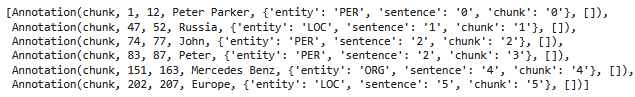

### **AutoGGUF in SparkNLP**

A GGUF model is a language model stored in the GGUF (GPT-generated unified format) — a compact, binary file format designed for **efficient and fast inference** with tools like llama.cpp, text-generation-webui, and other lightweight LLM runners.


GGUFs are optimized for CPU/GPU inference (especially on local devices) and they **support quantization, reducing model** size (e.g., 4-bit, 5-bit versions).

They are very **useful for running LLMs locally** on laptops and serving quantized models efficiently in low-resource environments.


In [57]:
EXPORT_PATH = "Phi-3.5-mini-instruct-Q4_K_M.gguf"

! wget "https://huggingface.co/bartowski/Phi-3.5-mini-instruct-GGUF/resolve/main/Phi-3.5-mini-instruct-Q4_K_M.gguf?download=true" -O  {EXPORT_PATH}

--2025-04-08 14:57:19--  https://huggingface.co/bartowski/Phi-3.5-mini-instruct-GGUF/resolve/main/Phi-3.5-mini-instruct-Q4_K_M.gguf?download=true
Resolving huggingface.co (huggingface.co)... 18.239.50.49, 18.239.50.103, 18.239.50.16, ...
Connecting to huggingface.co (huggingface.co)|18.239.50.49|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs-us-1.hf.co/repos/cd/20/cd204ca23871eaf6393e5d738941cb2934512acd406d6a48c70a1ed50034800c/e4165e3a71af97f1b4820da61079826d8752a2088e313af0c7d346796c38eff5?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27Phi-3.5-mini-instruct-Q4_K_M.gguf%3B+filename%3D%22Phi-3.5-mini-instruct-Q4_K_M.gguf%22%3B&Expires=1744127839&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTc0NDEyNzgzOX19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy11cy0xLmhmLmNvL3JlcG9zL2NkLzIwL2NkMjA0Y2EyMzg3MWVhZjYzOTNlNWQ3Mzg5NDFjYjI5MzQ1MTJhY2Q0MDZkNmE0OGM3MGExZWQ1MDAzNDgwMGMvZTQxNjVlM2E3MWFmOTdm

In [58]:
from sparknlp.annotator import *

# All these params should be identical to the original ONNX model
autoGGUFModel = (
    AutoGGUFModel.loadSavedModel(EXPORT_PATH, spark)
    .setInputCols("document")
    .setOutputCol("completions")
    .setBatchSize(4)
    .setNPredict(20)
    .setNGpuLayers(99)
)

In [59]:
autoGGUFModel.write().overwrite().save(f"Phi-3.5-mini-instruct-Q4_K_M_spark_nlp")

In [60]:
!rm -rf {EXPORT_PATH}

In [61]:
! ls -l Phi-3.5-mini-instruct-Q4_K_M_spark_nlp

total 2337152
drwxr-xr-x 2 root root       4096 Apr  8 15:00 metadata
-rwxr-xr-x 1 root root 2393232672 Apr  8 15:00 Phi-3.5-mini-instruct-Q4_K_M.gguf


#### **Text Generation**

In [64]:
import sparknlp
from sparknlp.base import *
from sparknlp.annotator import *
from pyspark.ml import Pipeline

document_assembler = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

auto_gguf_model = AutoGGUFModel.load("Phi-3.5-mini-instruct-Q4_K_M_spark_nlp")\
    .setInputCols("document")\
    .setOutputCol("completions")\
    .setBatchSize(4)\
    .setNPredict(100)

pipeline = Pipeline(stages=[document_assembler, auto_gguf_model])

data = spark.createDataFrame([["Patient has type II diabetes "]]).toDF("text")

result = pipeline.fit(data).transform(data)
result.select("completions.result").show(truncate=False)

+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|result                                                                                                                                                                                                                                                                                                                                                                                                                |
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### **Question & Answering**

In [65]:
prompt = "What is the indication for the drug Methadone?"

data = spark.createDataFrame([[prompt]]).toDF("text")
data.show(truncate=100)

+----------------------------------------------+
|                                          text|
+----------------------------------------------+
|What is the indication for the drug Methadone?|
+----------------------------------------------+



In [66]:
results = pipeline.fit(data).transform(data).cache()

results.select("completions.result").show(truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|result                                                                                                                                                                                                                                                                                                                                                                     |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### **Multiple Choice Questions**

In [67]:
prompt = """
A 23-year-old pregnant woman at 22 weeks gestation presents with burning upon urination. She states it started 1 day ago and has been worsening despite drinking more water and taking cranberry extract. She otherwise feels well and is followed by a doctor for her pregnancy. Her temperature is 97.7°F (36.5°C), blood pressure is 122/77 mmHg, pulse is 80/min, respirations are 19/min, and oxygen saturation is 98% on room air. Physical exam is notable for an absence of costovertebral angle tenderness and a gravid uterus.
Which of the following is the best treatment for this patient?
A: Ampicillin
B: Ceftriaxone
C: Ciprofloxacin
D: Doxycycline
E: Nitrofurantoin
"""

data = spark.createDataFrame([[prompt]]).toDF("text")

data.show(truncate=100)

+----------------------------------------------------------------------------------------------------+
|                                                                                                text|
+----------------------------------------------------------------------------------------------------+
|\nA 23-year-old pregnant woman at 22 weeks gestation presents with burning upon urination. She st...|
+----------------------------------------------------------------------------------------------------+



In [68]:
results = pipeline.fit(data).transform(data).cache()

print(results.select("completions").collect()[0].completions[0].result)

The best treatment for a pregnant woman experiencing a urinary tract infection (UTI) is an antibiotic that is safe during pregnancy. Among the options provided, nitrofurantoin (Option E) is commonly used for treating UTIs in pregnant women when indicated, especially in the absence of contraindications (such as a patient with poor renal function or in the third trimester). Ampicillin, ceft


For more details, please check this notebook:

https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/open-source-nlp/23.0.AutoGGUF_in_SparkNLP.ipynb

### **OpenAI in Spark NLP**

Spark NLP offers a seamless integration with various OpenAI APIs, presenting a powerful synergy.

Since Spark NLP 5.1.0, the library supports `OpenAICompletion` for text generation:


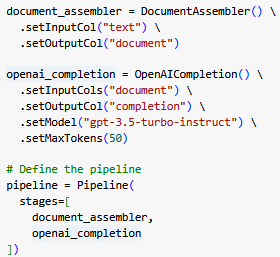




and `OpenAIEmbeddings` for creating vector representation of texts.

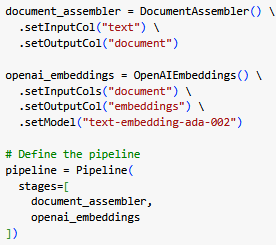

This integration not only ensures the utilization of OpenAI's capabilities but also capitalizes on Spark's inherent scalability advantages.



Please check this notebook for details:


https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/open-source-nlp/22.1.OpenAI_In_SparkNLP.ipynb






### **LLAMA2Transformer in Spark NLP**

[Llama 2](https://ai.meta.com/research/publications/llama-2-open-foundation-and-fine-tuned-chat-models/) is a collection of pretrained and fine-tuned large language models (LLMs) ranging in scale from 7 billion to 70 billion parameters.

`LLAMA2Transformer` is compatible with quantized models (in INT4 or INT8) for CPUs, allowing the use of state-of-the-art models in consumer computers and environments. It supports ONNX exports and quantizations for:

* 16 bit (CUDA only)
* 8 bit (CPU or CUDA)
* 4 bit (CPU or CUDA)  




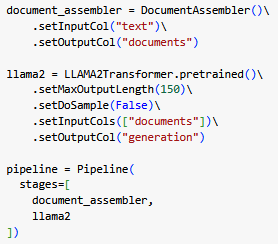


Please check this notebook for details:

https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/open-source-nlp/22.0.Llama2_Transformer_In_SparkNLP.ipynb